In [1]:
MODE = 'LOCAL'  # ['LOCAL', 'COLAB']

# Imports

In [5]:
# Colab
if MODE == 'COLAB':
    from google.colab import drive

# paths
import os

# data
import pandas as pd

# sklearn
from sklearn.model_selection import train_test_split

# math
import numpy as np

# plotting
from matplotlib import pyplot as plt
import seaborn as sns

# sklearn pipeline & preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import kendalltau
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score
from sklearn.base import clone as clone_model

In [13]:
# PEP 8 standard
# %%capture
!pip install pycodestyle 
!pip install --index-url https://test.pypi.org/simple/ nbpep8 
from nbpep8.nbpep8 import pep8

     ---------------------------------------- 41.5/41.5 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://test.pypi.org/simple/



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# %%capture

if MODE == 'COLAB':
    def download_files(url_dict):
        for file, url in url_dict.items():
            print(f'Downloading {file}')
            !wget -O {file} {url} {file}

    git_download_path = \
        'https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/'

    files = [
        'sklearn_utils.py',
        'model.py'
    ]

    url_dict = {file: git_download_path + file for file in files}
    download_files(url_dict)

In [21]:
if MODE == 'COLAB':
    import importlib
    import sklearn_utils
    import model

    def reload_all(modules_list_):
        for module in modules_list_:
            importlib.reload(module)

    reload_all(
        [
            sklearn_utils,
            model
            # other modules
        ]
    )

from model import Model
from sklearn_utils import (
    plot_cv_results,
    dict_subset,
    fit_grid_search
)

# Helper functions & constants

In [22]:
TRAINVAL_SIZE = 0.8
TRAIN_SIZE = 0.8  # size(trainval) * train_size
RANDOM_STATE = 42
PSYCHOLOGIC_SAMPLE_SIZE = 0.7

In [28]:
def get_X_Y(df_):
    return df_[:, 1:], df_[:, 0]

def _pep8(arg):
    if MODE == 'COLAB':
        pep8(arg)


_pep8(_ih)

In [29]:
def plot_insights(df_train_, df_sample_):
    _ = plot_averaged_question_responses(df_train_)

    plot_person_response(
        df_sample_,
        df_indices_=np.unique(df_sample_.index[:5])
    )

    plot_dishonest_responses(df_sample_)


_pep8(_ih)

In [30]:
def read_data(root_path, folder_name):
    if folder_name == '5. PHQ9_GAD7':

        phq9_gad_7_csv_path = os.path.join(
            root_path, '5. PHQ9_GAD7', 'PHQ9_GAD7_df.csv')
        assert os.path.isfile(phq9_gad_7_csv_path)
        return pd.read_csv(phq9_gad_7_csv_path, sep=';')

    if folder_name == '2. PRMQ':
        path = os.path.join(
            root_path, '2. PRMQ', 'PRMQ_df.csv')
        assert os.path.isfile(path)
        return pd.read_csv(path, sep=',')

    if folder_name == '3. PCL':
        path = os.path.join(
            root_path, '3. PCL', 'PCL5_df.xlsx'
        )
        assert os.path.isfile(path)
        return pd.read_excel(path)

    if folder_name == '4. NAQ_R':
        path = os.path.join(
            root_path, '4. NAQ_R', 'NAQ_R_df.csv'
        )
        assert os.path.isfile(path)
        df = pd.read_csv(path, sep=';')
        df = df.loc[
            (df['CONDITION'] == 'H')
            | (df['CONDITION'] == 'D'),
            :
        ]
        return df

    if folder_name == '6. PID5':
        path = os.path.join(
            root_path, '6. PID5', 'PID5_df.csv')
        print(os.listdir(os.path.join(root_path, '6. PID5')))
        assert os.path.isfile(path)
        return pd.read_csv(path)

    if folder_name == '7. shortPID5':
        path = os.path.join(
            root_path, folder_name, 'sPID-5_df.csv'
        )
        assert os.path.isfile(path)
        return pd.read_csv(path, sep=',')

    if folder_name == '8. PRFQ':
        path = os.path.join(
            root_path, folder_name, 'PRFQ_df.csv'
        )
        assert os.path.isfile(path)
        return pd.read_csv(path, sep=',')

    if folder_name == '9. IESR':
        path = os.path.join(
            root_path, folder_name, 'IESR_df.csv'
        )
        assert os.path.isfile(path)
        return pd.read_csv(path, sep=',')

    if folder_name == '1. shortDT (2)':
        ji_path = os.path.join(
            root_path, folder_name, 'DT_df_JI.csv')
        cc_path = os.path.join(
            root_path, folder_name, 'DT_df_CC.csv')
        assert os.path.isfile(ji_path)
        assert os.path.isfile(cc_path)

        return pd.read_csv(ji_path, sep=';'), \
            pd.read_csv(cc_path, sep=',')

    if folder_name == '13. BF (3)':
        path_ctu = os.path.join(
            root_path, folder_name, 'BF_df_CTU.csv')
        path_ou = os.path.join(
            root_path, folder_name, 'BF_df_OU.csv')
        path_v = os.path.join(
            root_path, folder_name, 'BF_df_V.csv'
        )
        assert os.path.isfile(path_ctu)
        assert os.path.isfile(path_ou)
        assert os.path.isfile(path_v)
        return pd.read_csv(path_ctu, sep=','), \
            pd.read_csv(path_ou, sep=','), \
            pd.read_csv(path_v, sep=',')

    if folder_name == '12. IADQ':
        path = os.path.join(
            root_path, folder_name, 'IADQ_df.csv'
        )
        return pd.read_csv(path, sep=',')

    if folder_name == '11. DDDT':
        path = os.path.join(
            root_path, folder_name, 'RAW_DDDT.CSV'
        )
        assert os.path.isfile(path)
        return pd.read_csv(path)


_pep8(_ih)

In [31]:
def check_data(dataset_):
    # Check is any NAN values
    assert dataset_.isna().sum().sum() == 0

    # Check that all values are in appropriate range
    assert (dataset_.values[:, :-1] <= 5).all() \
        & (dataset_.values[:, :-1] >= 0).all()

In [32]:
def check_split_correctness(df_, target_column_, eps_=0.01):
    '''
    Checks that class balance is still 50%/50%
    '''
    assert abs(df_[target_column_].value_counts(normalize=True)['D'] - 0.5) \
        <= eps_
    assert abs(df_[target_column_].value_counts(normalize=True)['H'] - 0.5) \
        <= eps_


_pep8(_ih)

In [33]:
def prepare_sample(
    dataset_,
    sample_size_,
    random_state_=RANDOM_STATE
):
    # Assume the proper structure of the dataset
    # (even number of rows - first honest, then dishonest
    # responses)

    '''
    We split the dataset into 2 halves (of honest and dishonest responses)
    Then generate a sample of random indices, subsample same sample from honest
    half, and dishonest half. And concatenate the samples
    '''

    honest_subset = pd.DataFrame(
        dataset_.loc[: (dataset_.shape[0] / 2) - 1]
    )
    dishonest_subset = pd.DataFrame(
        dataset_.loc[dataset_.shape[0] / 2:]
    )

    dishonest_subset.reset_index(inplace=True)
    dishonest_subset.drop(['index'], axis='columns', inplace=True)

    assert honest_subset.shape[0] == dishonest_subset.shape[0]
    assert honest_subset.shape[0] + dishonest_subset.shape[0] \
        == dataset_.shape[0]
    assert honest_subset.CONDITION.nunique() \
        == dishonest_subset.CONDITION.nunique() \
        == 1
    assert (honest_subset.index == dishonest_subset.index).all()

    np.random.seed(random_state_)

    sample = np.random.choice(
        range(honest_subset.shape[0]),
        replace=False,
        size=int(honest_subset.shape[0] * sample_size_)
    )

    res = pd.concat(
        [
            honest_subset.loc[sample],
            dishonest_subset.loc[sample]
        ]
    )
    assert res.shape[1] \
        == honest_subset.shape[1] \
        == dishonest_subset.shape[1]

    return res


_pep8(_ih)

In [34]:
def verify_sample_correctness(df_original_, df_sampled_):
    for i in df_sampled_.index:
        # assert that both Honest and Dishonest conditions are present
        assert len(df_sampled_.index[df_sampled_.index == i]) == 2
        assert 'H' in df_sampled_.loc[i].CONDITION.values \
            and 'D' in df_sampled_.loc[i].CONDITION.values

        # Sample of honest and dishonest response of the same
        # person in original dataset
        original_sample = df_original_.loc[
            [i, int(df_original_.shape[0] / 2) + i]
        ]
        assert (original_sample.values == df_sampled_.loc[i].values).all()


_pep8(_ih)

In [35]:
def plot_averaged_question_responses(df_):
    '''
    Assumed structure: target is CONDITION, with H and D values
    1. Splits the dataset into Honest and Dishonest
    2. For each question, computes average score in Honest
    dataset, and Dishonest dataset
    3. Plots the results
    '''

    df_honest = df_[df_['CONDITION'] == 'H']
    df_dishonest = df_[df_['CONDITION'] == 'D']

    result = {}
    for question in df_.columns[df_.columns != 'CONDITION']:
        mean_response_honest = df_honest[question].mean()
        mean_response_dishonest = df_dishonest[question].mean()

        result[question] = {
            'honest': mean_response_honest,
            'dishonest': mean_response_dishonest
        }

    mean_responses_df = pd.DataFrame(result).transpose()

    mean_responses_df['relative_delta'] = \
        (mean_responses_df['dishonest'] - mean_responses_df['honest']) \
        / (mean_responses_df['honest'])

    ax = mean_responses_df.plot(kind='bar')
    ax.set_title(
        'Mean responses in honest and dishonest conditions \n(shuffled people)'
    )
    ax.grid()

    return mean_responses_df


_pep8(_ih)

In [36]:
def plot_person_response(df_, df_indices_):
    for df_index in df_indices_:
        ax = df_.loc[
            df_index,
            [c for c in df_.columns if c != 'CONDITION']
        ].transpose().plot(kind='bar')
        ax.legend(df_.loc[df_index, 'CONDITION'])
        ax.set_title(f'Person with index {df_index}')
        ax.grid()


_pep8(_ih)

In [37]:
def _visualize_averages(
    df_sample_,
    average_honest_responses,
    average_dishonest_responses,
    average_difference_in_response
):
    ax = pd.DataFrame(
        [
            average_honest_responses,
            average_dishonest_responses,
            average_difference_in_response
        ],
        columns=df_sample_.columns[df_sample_.columns != 'CONDITION'],
        index=['Honest', 'Dishonest', 'Difference']
    ).transpose().plot(kind='bar')

    ax.grid()
    ax.set_title('Average between dishonest and honest responses')
    ax.set_xlabel('Question')
    ax.set_ylabel('Differents in scale')
    ax.legend(loc='lower right')


def plot_dishonest_responses(df_sample_):
    '''
    - Requires input dataframe with the structure,
    like in #5 or #2 dataframes (half of honest, half of
    dishonest rows)
    1. For every person:
        - Collects honest response of this particular person
        - Collects dishonest response of this particular person
        - Collects difference (Dishonest - Honest) for every question
    2. Builds a bar chart, where for each question there are three bars:
        - Average honest response, averaged across all persons
        - Average dishonest response, averaged across all persons
        - Average difference between dishonest and honest response
        (we calculate the difference person-wise --> then take average)
    3. Returns 3 arrays:
        - List of lists of differences in responses
        - List of lists of honest responses
        - List of lists of dishonest responses
    '''

    fig, ax = plt.subplots()
    questions = df_sample_.columns[df_sample_.columns != 'CONDITION']
    unique_person_indices = np.unique(df_sample_.index)
    differences_in_response = []
    honest_responses_array = []
    dishonest_responses_array = []
    plotting_params = dict(marker='o', alpha=0.1)

    for unique_person_index in unique_person_indices:
        # view with Honest and Dishonest responses of the same person
        person_responses = pd.DataFrame(
            df_sample_.loc[unique_person_index])
        honest_responses = person_responses.loc[
            person_responses['CONDITION'] == 'H',
            questions]
        dishonest_responses = person_responses.loc[
            person_responses['CONDITION'] == 'D',
            questions]

        ax.scatter(
            x=range(honest_responses.shape[1]),
            y=honest_responses.values[0],
            color='red',
            **plotting_params
        )

        ax.scatter(
            x=range(honest_responses.shape[1]),
            y=dishonest_responses.values[0],
            color='blue',
            **plotting_params
        )
        differences_in_response.append(
            dishonest_responses.values[0] - honest_responses.values[0])

        honest_responses_array.append(honest_responses.values[0])
        dishonest_responses_array.append(dishonest_responses.values[0])
        del person_responses

    ax.set_xlabel('Questions')
    ax.set_ylabel('Response')
    ax.legend(['Honest', 'Dishonest'], loc='lower right')
    ax.grid()

    # BUILDING ANOTHER PLOT OF DIFFERENCE BETWEEN
    # AVERAGE HONEST AND DISHONEST RESPONSE
    average_difference_in_response = np.mean(
        differences_in_response,
        axis=0)

    average_honest_responses = np.mean(
        honest_responses_array,
        axis=0)

    average_dishonest_responses = np.mean(
        dishonest_responses_array,
        axis=0)

    _visualize_averages(
        df_sample_,
        average_honest_responses,
        average_dishonest_responses,
        average_difference_in_response
    )


_pep8(_ih)

In [38]:
def plot_feature_importances(grid_search_results_):
    dataframe_dict = {}
    for model_name, gs_result in grid_search_results_.items():
        dataframe_dict[model_name] = \
            get_feature_importances(
                model_name,
                grid_search_results_[model_name]
            )
    ax = pd.DataFrame(dataframe_dict).plot(kind='bar')
    ax.grid()


def get_feature_importances(
    model_name_,
    grid_search_results_
):
    best_estimator = grid_search_results_.best_estimator_
    if model_name_ == 'SVM':
        return best_estimator.coef_[0]
    elif model_name_ == 'Random forest':
        return best_estimator.feature_importances_


_pep8(_ih)

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from model import Model
from sklearn_utils import plot_cv_results


def plot_problem_statement(df_trainval_):
    # 1. Create data preprocessing pipeline
    target_columns = ['CONDITION']
    target_pipeline = Pipeline(
        [('encode', OrdinalEncoder())])
    preprocessor = ColumnTransformer(
        [
            ('target', target_pipeline, target_columns)
        ],
        remainder='passthrough'
    )

    # 2. Correctly process the data
    df_trainval_processed = preprocessor.fit_transform(df_trainval_)
    X_trainval_processed, Y_trainval_processed = \
        get_X_Y(df_trainval_processed)

    # 3. Define models
    svm_model = Model(
        SVC(),
        'SVM',
        [
            {
                'random_state': [RANDOM_STATE],
                # IMPORTANT! can calc importance only with linear kernel
                'kernel': ['linear']
            }
        ],
        [
            # No specified randomized search parameters
        ]
    )
    random_forest_model = Model(
        RandomForestClassifier(),
        'Random forest',
        [
            {
                'random_state': [RANDOM_STATE]
            }
        ],
        [
            # Not specified
        ]
    )

    all_models = {
        model.name: model
        for model in [
            svm_model,
            random_forest_model
        ]
    }

    # 4. Plot cross validation performance on
    # preprocessed trainval dataset for models
    # with default sklearn parameters
    grid_search_results = fit_grid_search(
        all_models,
        X_=X_trainval_processed,
        Y_=Y_trainval_processed,
        cv_=5,
        scoring_='accuracy'
    )

    cv_res = plot_cv_results(
        {
            model_name: res.best_estimator_
            for model_name, res in grid_search_results.items()
        },
        X_=X_trainval_processed,
        Y_=Y_trainval_processed,
        cv_=5,
        scoring_='accuracy'
    )

    # 5. Plot feature importances
    plot_feature_importances(
        grid_search_results
    )


_pep8(_ih)

In [40]:
def calculate_validation_performance(
    sklearn_model_,  # grid_search_results_,
    X_train_,
    Y_train_,
    X_validation_,
    Y_validation_,
    metrics_function_,
    feature_selection_function_,
    percentiles_
):
    '''
    percentiles_ - list of percentile values - how much of the features
    we retain.

    '''
    model_before_feature_selection = clone_model(sklearn_model_)
    model_after_feature_selection = clone_model(sklearn_model_)

    # Important - must refit on X_train and Y_train from scratch,
    # because grid search models were refit on X_train + X_validation
    # data, therefore comparison will not be fair
    model_before_feature_selection.fit(X_train_, Y_train_)

    metrics_before_feature_selection = metrics_function_(
        model_before_feature_selection.predict(X_validation_),
        Y_validation_)

    res_metrics = []
    n_features = []
    for percentile in percentiles_:
        X_train_reduced, X_validation_reduced = perform_feature_selection(
            feature_selection_function_,
            percentile,
            X_train_=X_train_,
            Y_train_=Y_train_,
            X_validation_=X_validation_,
            Y_validation_=Y_validation_
        )
        n_features.append(X_train_reduced.shape[1])

        model_after_feature_selection.fit(
            X_train_reduced, Y_train_)
        metrics_after_feature_selection = metrics_function_(
            model_after_feature_selection.predict(X_validation_reduced),
            Y_validation_)
        res_metrics.append(metrics_after_feature_selection)

    return {
        'percentiles': percentiles_,
        'n_features': n_features,
        'metrics': res_metrics
    }


_pep8(_ih)

In [41]:
def perform_feature_selection(
    feature_selection_function_,
    percentile_,
    X_train_,
    Y_train_,
    X_validation_,
    Y_validation_
):
    feature_selector = SelectPercentile(
        score_func=feature_selection_function_,
        percentile=percentile_
    )

    X_train_reduced = feature_selector.fit_transform(X_train_, Y_train_)
    X_validation_reduced = feature_selector.transform(X_validation_)
    return X_train_reduced, X_validation_reduced


_pep8(_ih)

In [42]:
def plot_validation_performance(results_dict_, **kwargs):
    fig, ax = plt.subplots(1, 2, figsize=kwargs.get('figsize') or (15, 5))
    fig.suptitle(
        kwargs.get('suptitle_') or '',
        fontsize=kwargs.get('fontsize_') or 10
    )

    ax2 = ax[0].twiny()
    ax3 = ax[1].twiny()

    ax[0].plot(
        results_dict_['n_features'],
        results_dict_['metrics'],
        marker='o',
        linestyle='--'
    )
    ax[0].set_title('Performance on the validation set')
    ax[0].set_xlabel('Number of retained features')
    ax[0].grid()

    ax[0].axhline(
        results_dict_['metrics'][-1],
        linestyle='--',
        color='red'
    )

    ax[1].plot(
        results_dict_['n_features'],
        [val - results_dict_['metrics'][-1]
         for val in results_dict_['metrics']],
        marker='o',
        linestyle='--'
    )
    ax[1].set_title('Difference between validation performance on' \
                    + '\n reduced and original data')
    ax[1].axhline(
        0,
        linestyle='--',
        color='red'
    )
    ax[1].grid()


def plot_selector_feature_scores(selector_, name_=''):
    fix, ax = plt.subplots()
    ax.bar(
        np.arange(len(selector_.scores_)),
        selector_.scores_
    )
    ax.set_title(name_)
    ax.grid()


_pep8(_ih)

In [43]:
def preprocess_data(
    df_trainval_,
    df_train_,
    df_validation_,
    df_test_,
    preprocessor_
):
    df_trainval_processed = preprocessor_.fit_transform(
        df_trainval_)
    df_train_processed = preprocessor_.fit_transform(
        df_train_)
    df_validation_processed = preprocessor_.transform(
        df_validation_)
    df_test_processed = preprocessor_.transform(
        df_test_)

    res = {
        'trainval': get_X_Y(df_trainval_processed),
        'train': get_X_Y(df_train_processed),
        'validation': get_X_Y(df_validation_processed),
        'test': get_X_Y(df_test_processed)
    }
    return res


_pep8(_ih)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder


def _run_feature_selection_experiment(
    df_trainval_,
    df_train_,
    df_validation_,
    df_test_,
    feature_selection_function_,  # chi2
    metrics_function_=accuracy_score
):
    # 1. Define preprocessing pipeline
    target_columns = ['CONDITION']
    target_pipeline = Pipeline([('encode', OrdinalEncoder())])
    preprocessor = ColumnTransformer(
        [('target', target_pipeline, target_columns)],
        remainder='passthrough'
    )

    # 2. Preprocess the data
    preprocessing_results = preprocess_data(
        df_trainval_, df_train_, df_validation_, df_test_,
        preprocessor)
    X_trainval_processed, Y_trainval_processed = \
        preprocessing_results['trainval']
    X_train_processed, Y_train_processed = \
        preprocessing_results['train']
    X_validation_processed, Y_validation_processed = \
        preprocessing_results['validation']
    X_test_processed, Y_test_processed = \
        preprocessing_results['test']

    # 3. Define models
    random_forest_model = Model(
        RandomForestClassifier(),
        'Random forest',
        [
            {
                'n_estimators': [5, 10, 20],
                'random_state': [42]
            }
        ],
        []
    )
    svm_model = Model(
        SVC(),
        'SVM',
        [
            {
                'kernel': ['linear'],
                'random_state': [42]
            }
        ],
        []
    )
    all_models = {
        model.name: model
        for model in [
            random_forest_model,
            svm_model
        ]
    }

    # 4. Run grid search on defined models
    grid_search_results = fit_grid_search(
        all_models,
        X_trainval_processed,
        Y_trainval_processed,
        cv_=5,
        scoring_='accuracy'
    )

    # 5. Perform feature selection experiment
    for model_name, grid_search_result in grid_search_results.items():
        feature_selection_results = calculate_validation_performance(
            grid_search_result.best_estimator_,
            X_train_processed,
            Y_train_processed,
            X_validation_processed,
            Y_validation_processed,
            metrics_function_=metrics_function_,
            feature_selection_function_=feature_selection_function_,
            percentiles_=[5, 10, 30, 50, 80, 100]
        )

        plot_validation_performance(
            feature_selection_results,
            suptitle_=model_name,
            fontsize_=15
        )
    return {
        'trainval_processed': (X_trainval_processed, Y_trainval_processed),
        'train': (X_train_processed, Y_train_processed),
        'validation': (X_validation_processed, Y_validation_processed),
        'test': (X_test_processed, Y_test_processed),
        'grid_search_results': grid_search_results
    }


def run_feature_selection_experiments(
    df_trainval_,
    df_train_,
    df_validation_,
    df_test_,
    feature_selectors_dict_,
    metrics_function_=accuracy_score
):
    result = {}
    for feature_selector_name, feature_selector in \
            feature_selectors_dict_.items():
        print(f'====== VVV RUNNING {feature_selector_name} VVV ======')
        experiment_result = _run_feature_selection_experiment(
            df_trainval_,
            df_train_,
            df_validation_,
            df_test_,
            feature_selector,
            metrics_function_
        )
        result[feature_selector_name] = experiment_result
    return result


_pep8(_ih)

In [45]:
from sklearn.model_selection import cross_val_score


def find_main_features(
    n_features_,
    feature_selection_function_,
    X_,
    Y_,
    sklearn_model_,
    scoring_='accuracy',
    **kwargs
):
    '''
    1. Constructs feature selector
    2. Applies fit_transform to the whole array
    3. Calculates mean cross-validation score on full data
    and reduced data (after feature selection)
    4. Reports cross validation scores and plots feature scores,
    including the features with the highest scores, that were used
    in reduced dataset
    '''

    feature_selector = SelectKBest(
        k=n_features_,
        score_func=feature_selection_function_)

    X_reduced = feature_selector.fit_transform(X_, Y_)
    print(f'Data shape before reduction: {X_.shape}')
    print(f'Data shape after reduction: {X_reduced.shape}')

    common_params = dict(
        estimator=sklearn_model_,
        scoring=scoring_,
        cv=kwargs.get('cv_') or 5)

    cross_val_scores_before = cross_val_score(
        **common_params, X=X_, y=Y_)
    cross_val_scores_after = cross_val_score(
        **common_params, X=X_reduced, y=Y_)

    main_features = np.argsort(feature_selector.scores_)[-1::-1][:n_features_]

    print(
        f'''
        Mean cross-validation {scoring_}:
        On full data:
        {np.mean(cross_val_scores_before)},
        On reduced data:
        {np.mean(cross_val_scores_after)}
        Principal features indices:
        {main_features}
        ''')

    plot_selector_feature_scores(feature_selector)
    return main_features


_pep8(_ih)

In [46]:
def visualize_clusters(df_, features, **kwargs):
    '''
    Features MUST BE SORTED - features[0] - most important feature,
    features[1], ... - less important features
    '''
    dict_honest_dishonest = {}
    for feature in features:
        dict_honest_dishonest[feature] = \
            {
                'honest': df_.loc[df_['CONDITION'] == 'H', [feature]],
                'dishonest': df_.loc[df_['CONDITION'] == 'D', [feature]]
            }

    # 1. 1D visualization - boxplots
    _, ax_1D = plt.subplots(figsize=kwargs.get('figsize') or (5, 5))
    sns.boxplot(
        x='CONDITION',
        y=features[0],
        data=df_,
        ax=ax_1D
    )
    ax_1D.grid()

    # 2. 2D visualization - scatter plot
    _, ax_2D = plt.subplots(figsize=kwargs.get('figsize') or (5, 5))
    ax_2D.grid()
    ax_2D.scatter(
        x=dict_honest_dishonest[features[0]]['honest'].values,
        y=dict_honest_dishonest[features[1]]['honest'].values,
        color='blue',
        label='honest',
        alpha=0.1)
    ax_2D.scatter(
        x=dict_honest_dishonest[features[0]]['dishonest'].values,
        y=dict_honest_dishonest[features[1]]['dishonest'].values,
        label='dishonest',
        color='red',
        alpha=0.1)
    ax_2D.set_xlabel(features[0])
    ax_2D.set_ylabel(features[1])
    ax_2D.legend()
    plt.show()

    # 3. 3D visualization - scatter plot
    fig, ax_3D = plt.subplots(figsize=kwargs.get('figsize') or (10, 10))
    ax_3D = plt.axes(projection='3d')
    ax_3D.grid()
    ax_3D.scatter(
        xs=dict_honest_dishonest[features[0]]['honest'].values,
        ys=dict_honest_dishonest[features[1]]['honest'].values,
        zs=dict_honest_dishonest[features[2]]['honest'].values,
        color='gray',
        label='honest')
    ax_3D.scatter(
        xs=dict_honest_dishonest[features[0]]['dishonest'].values,
        ys=dict_honest_dishonest[features[1]]['dishonest'].values,
        zs=dict_honest_dishonest[features[2]]['dishonest'].values,
        color='red',
        label='dishonest')
    ax_3D.set_xlabel(features[0])
    ax_3D.set_ylabel(features[1])
    ax_3D.set_zlabel(features[2])

    if kwargs.get('elev') and kwargs.get('azim'):
        ax_3D.view_init(elev=kwargs.get('elev'), azim=kwargs.get('azim'))
    ax_3D.legend()


_pep8(_ih)

In [47]:
def get_feature_names(
    X_trainval_processed_,
    df_trainval_,
    feature_indices_,
):
    '''
    After you apply column transformer,
    position of the features in the processed dataset
    can change with respect to the original data.
    Therefore, we need to control it
    '''
    # Check if columns shifted
    assert df_trainval_.shape[1] == X_trainval_processed_.shape[1] + 1

    for i in range(X_trainval_processed_.shape[1]):
        assert (X_trainval_processed_[:, i] == df_trainval_.values[:, i]).all()

    return df_trainval_.columns[feature_indices_]


_pep8(_ih)

In [48]:
def _report_outliers_percentage(df_, feature_name_):
    q3 = df_.quantile(0.75)
    q1 = df_.quantile(0.25)
    iqr = q3 - q1

    lower_lim = q1 - 1.5 * iqr
    upper_lim = q3 + 1.5 * iqr

    outlier_percentage = df_ \
        .loc[
            (df_[feature_name_] > upper_lim[feature_name_])
            | (df_[feature_name_] < lower_lim[feature_name_]),
            :
        ].shape[0] / len(df_)
    return round(outlier_percentage, 2)


def report_outliers(
    df_,
    feature_name_
):
    honest_subset = df_.loc[
        df_['CONDITION'] == 'H', [feature_name_]]
    dishonest_subset = df_.loc[
        df_['CONDITION'] == 'D', [feature_name_]]

    print(f'Median of {feature_name_} dishonest: {dishonest_subset.median()}')
    print(f'Median of {feature_name_} honest: {honest_subset.median()}')

    outlier_percentage_honest = \
        _report_outliers_percentage(honest_subset, feature_name_)
    outlier_percentage_dishonest = \
        _report_outliers_percentage(dishonest_subset, feature_name_)

    print(f'Outliers % honest subset: {outlier_percentage_honest}')
    print(f'Outliers % dishonest subset: {outlier_percentage_dishonest}')


_pep8(_ih)

# Mount drive & set up paths

In [49]:
if MODE == 'COLAB':
    drive.mount('/content/gdrive')
    datasets_folder_path = \
        '/content/gdrive/MyDrive/ML/DataScience_Dataset 2022-2023'

if MODE == 'LOCAL':
    datasets_folder_path = './Data'

assert os.path.isdir(datasets_folder_path)

# 1 shortDT

## Read the data

In [50]:
dataset_ji, dataset_cc = read_data(
    datasets_folder_path,
    '1. shortDT (2)'
)

## Quick look and check the data

In [51]:
check_data(dataset_ji)
check_data(dataset_cc)

In [52]:
check_split_correctness(dataset_ji, 'CONDITION')
check_split_correctness(dataset_cc, 'CONDITION')

## Create trainval + test + psychological sets

### Data sampling for the model

In [53]:
from sklearn.model_selection import train_test_split


df_trainval_ji, df_test_ji = train_test_split(
    dataset_ji,
    random_state=RANDOM_STATE,
    train_size=TRAINVAL_SIZE,
    stratify=dataset_ji['CONDITION']
)

[
    check_split_correctness(df, 'CONDITION')
    for df in [df_trainval_ji, df_test_ji]
]

df_trainval_ji.shape, df_test_ji.shape

((691, 28), (173, 28))

In [54]:
df_train_ji, df_validation_ji = train_test_split(
    df_trainval_ji,
    random_state=RANDOM_STATE,
    stratify=df_trainval_ji['CONDITION'],
    train_size=TRAIN_SIZE
)

[
    check_split_correctness(df, 'CONDITION')
    for df in [df_train_ji, df_test_ji]
]

df_train_ji.shape, df_test_ji.shape

((552, 28), (173, 28))

In [55]:
df_trainval_cc, df_test_cc = train_test_split(
    dataset_cc,
    train_size=TRAINVAL_SIZE,
    random_state=RANDOM_STATE,
    stratify=dataset_cc['CONDITION']
)

[
    check_split_correctness(df, 'CONDITION')
    for df in [df_trainval_cc, df_test_cc]
]

df_trainval_cc.shape, df_test_cc.shape

((385, 28), (97, 28))

In [56]:
df_train_cc, df_validation_cc = train_test_split(
    df_trainval_cc,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE,
    stratify=df_trainval_cc['CONDITION']
)

[
    check_split_correctness(df, 'CONDITION')
    for df in [df_train_cc, df_validation_cc]
]

df_train_cc.shape, df_validation_cc.shape

((308, 28), (77, 28))

### Data sampling for psychological insights

In [57]:
df_sample_ji = prepare_sample(
    dataset_ji,
    sample_size_=PSYCHOLOGIC_SAMPLE_SIZE,
    random_state_=RANDOM_STATE
)

verify_sample_correctness(dataset_ji, df_sample_ji)
df_sample_ji.head()

Mach1   Mach2   Mach3   Mach4   Mach5   Mach6   Mach7   Mach8   Mach9   \
424       4       3       3       3       1       4       4       2       4   
75        5       4       2       4       1       2       4       2       2   
180       3       2       2       2       3       3       3       3       2   
30        4       2       4       4       4       5       4       2       4   
392       4       2       3       4       2       4       4       2       2   

     Psycho1   ...  Narc1   Narc2   Narc3   Narc4   Narc5   Narc6   Narc7   \
424         1  ...       2       3       2       3       3       4       4   
75          2  ...       4       2       2       3       4       2       2   
180         2  ...       3       3       2       3       2       3       2   
30          1  ...       2       4       2       1       4       4       1   
392         3  ...       3       2       3       3       4       2       4   

     Narc8   Narc9   CONDITION  
424       4       4          H  
75        4       5          H  
180       3       4          H  
30        3       4          H  
392       4       4          H  

[5 rows x 28 columns]

In [58]:
df_sample_cc = prepare_sample(
    dataset_cc,
    sample_size_=PSYCHOLOGIC_SAMPLE_SIZE,
    random_state_=RANDOM_STATE
)

verify_sample_correctness(dataset_cc, df_sample_cc)
df_sample_cc.head()

Mach1   Mach2   Mach3   Mach4   Mach5   Mach6   Mach7   Mach8   Mach9   \
24        4       2       3       3       4       3       3       1       3   
6         4       2       2       4       4       4       4       3       4   
222       4       2       2       3       2       3       3       3       4   
208       4       1       2       2       4       2       4       3       4   
236       4       1       3       4       1       2       3       2       1   

     Psycho1   ...  Narc1  Narc2   Narc3   Narc4   Narc5   Narc6  Narc7   \
24          4  ...      3       3       2       1       2      3       2   
6           4  ...      4       2       3       3       3      2       2   
222         1  ...      1       2       2       2       1      2       1   
208         1  ...      2       2       2       3       3      2       3   
236         2  ...      3       3       3       3       3      4       3   

     Narc8   Narc9   CONDITION  
24        2       4          H  
6         3       4          H  
222       2       4          H  
208       2       5          H  
236       2       2          H  

[5 rows x 28 columns]

## Data exploration (on train set only)

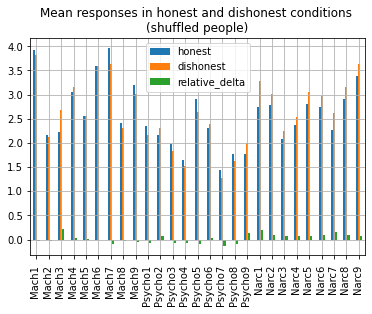

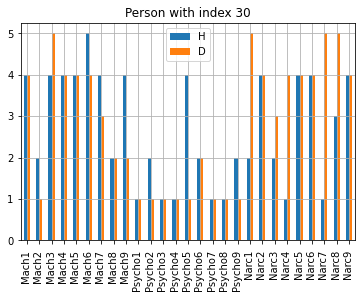

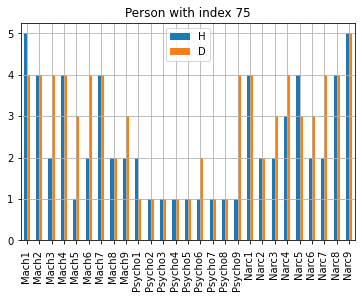

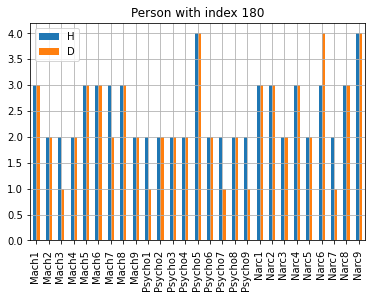

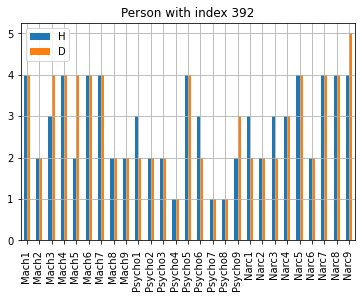

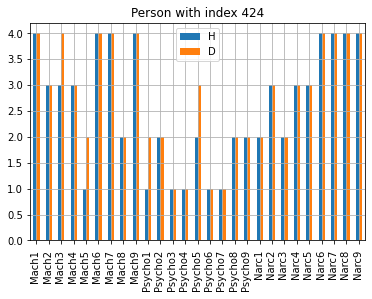

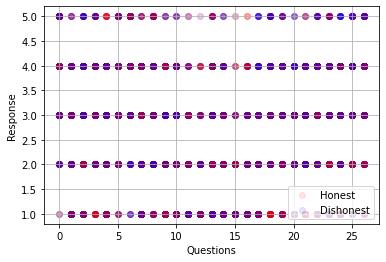

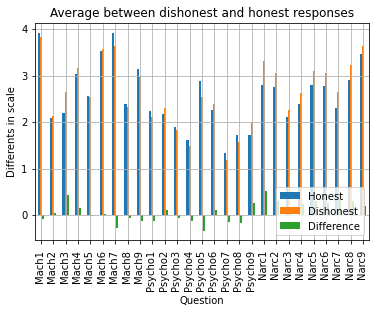

In [59]:
plot_insights(df_train_ji, df_sample_ji)

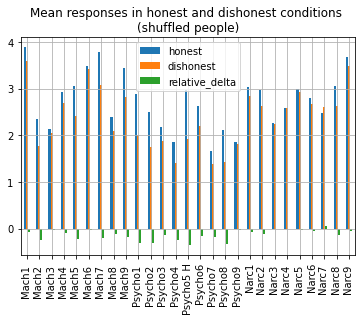

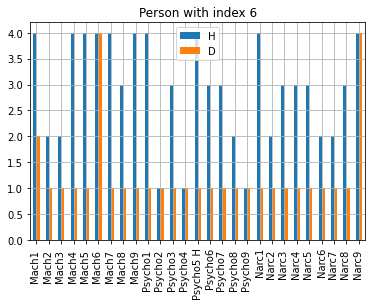

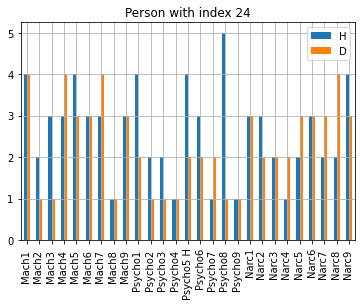

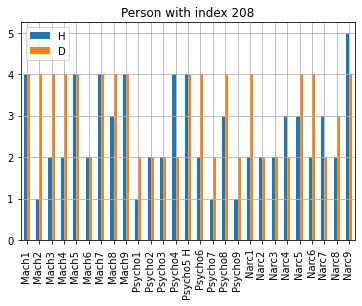

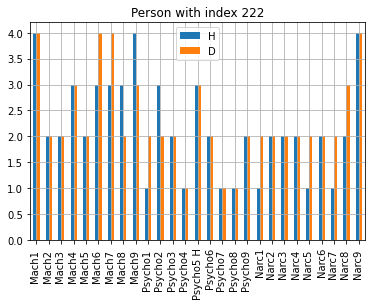

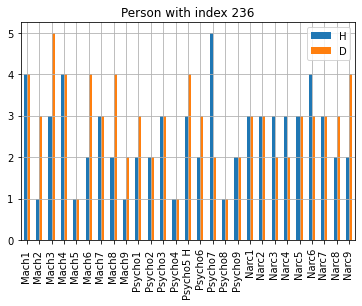

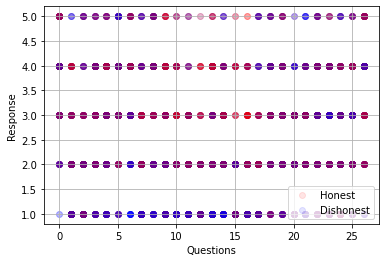

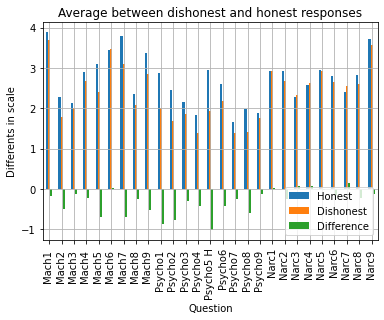

In [ ]:
plot_insights(df_train_cc, df_sample_cc)

## Problem statement

Fitting SVM
Fitting Random forest
Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
Random forest                1                0                          0.583193           0.034084
SVM                          0.704416         0.0070174                  0.652706           0.0293288


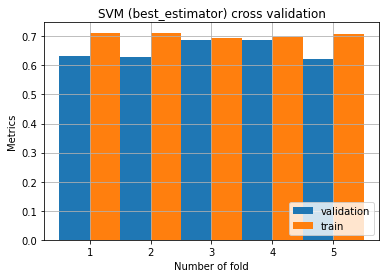

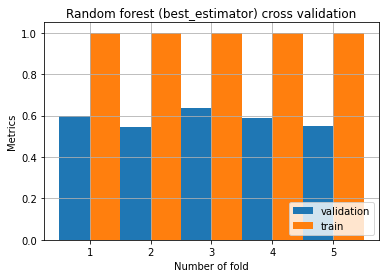

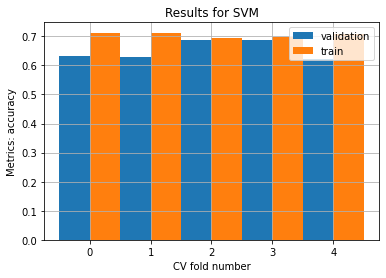

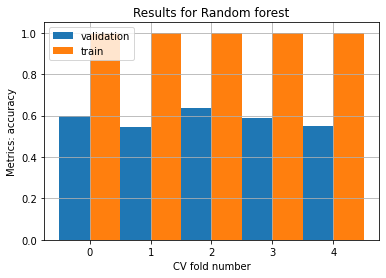

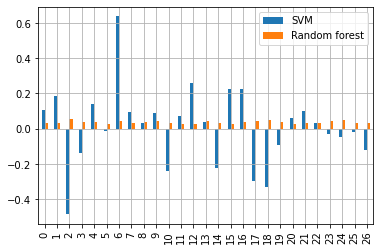

In [60]:
plot_problem_statement(df_trainval_ji)

Fitting SVM
Fitting Random forest
Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
SVM                          0.788961         0.0123206                  0.74026            0.0272418
Random forest                1                0                          0.761039           0.0291558


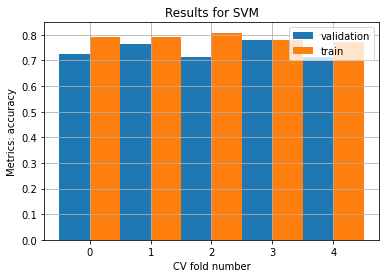

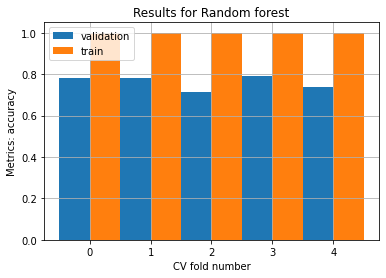

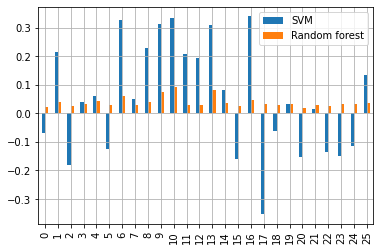

In [ ]:
plot_problem_statement(df_trainval_cc)

## Robust feature selection

### Chi squared, Mutual information, ANOVA testing, Kendall's rank coefficient

====== VVV RUNNING chi2 VVV ======
Fitting Random forest
Fitting SVM
====== VVV RUNNING mutual information VVV ======
Fitting Random forest
Fitting SVM
====== VVV RUNNING ANOVA VVV ======
Fitting Random forest
Fitting SVM


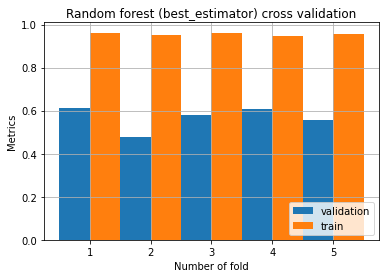

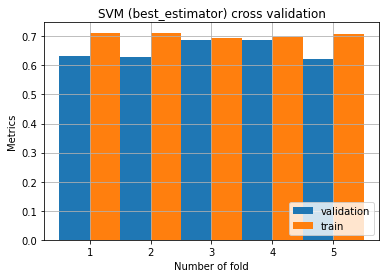

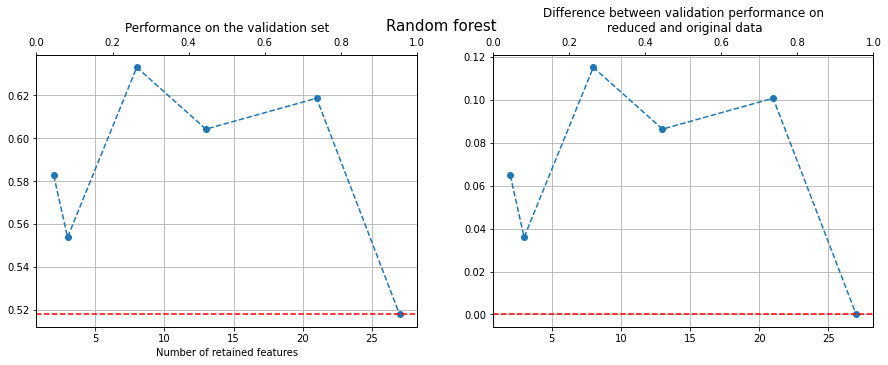

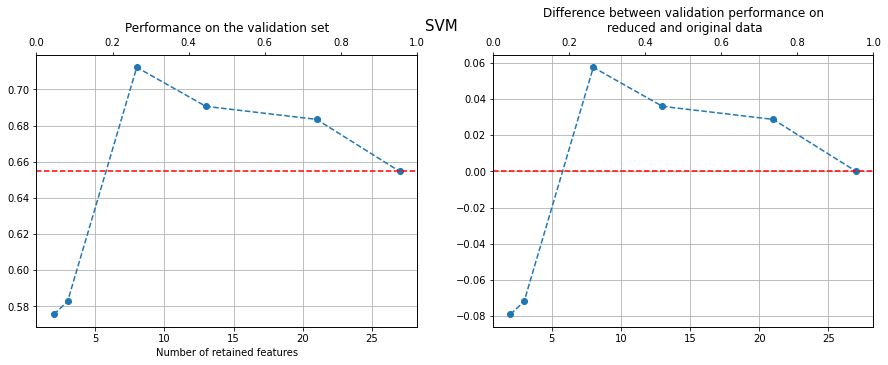

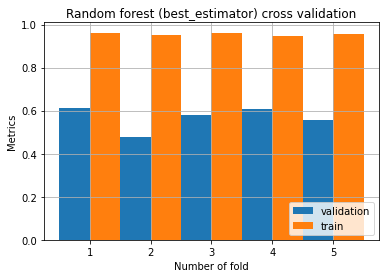

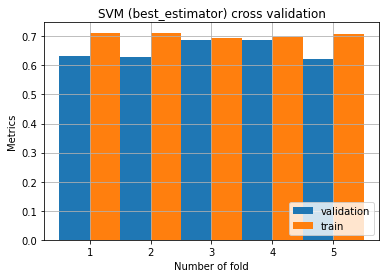

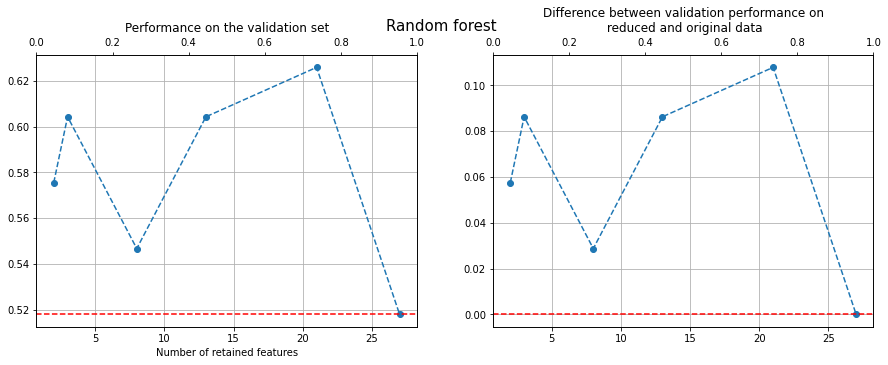

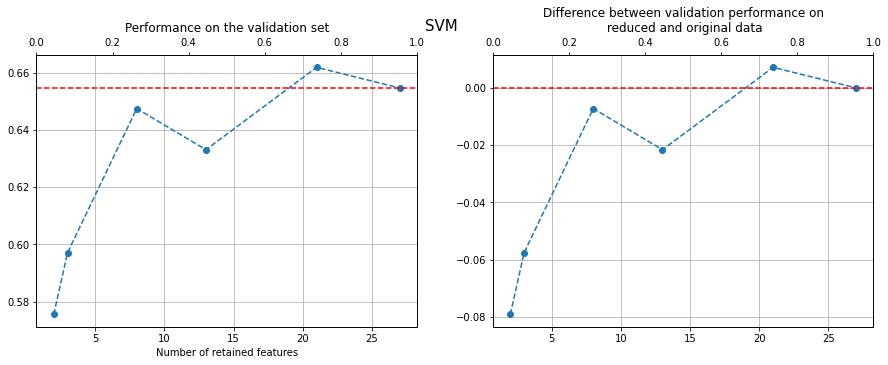

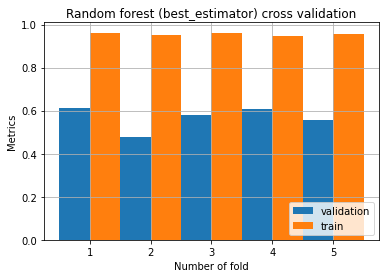

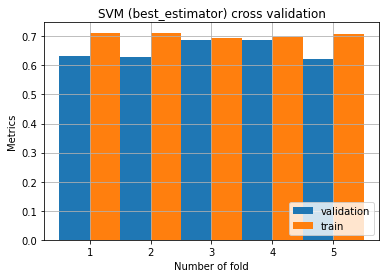

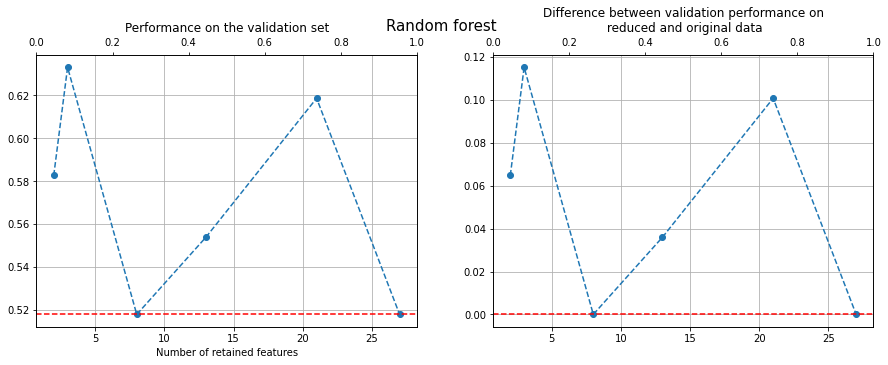

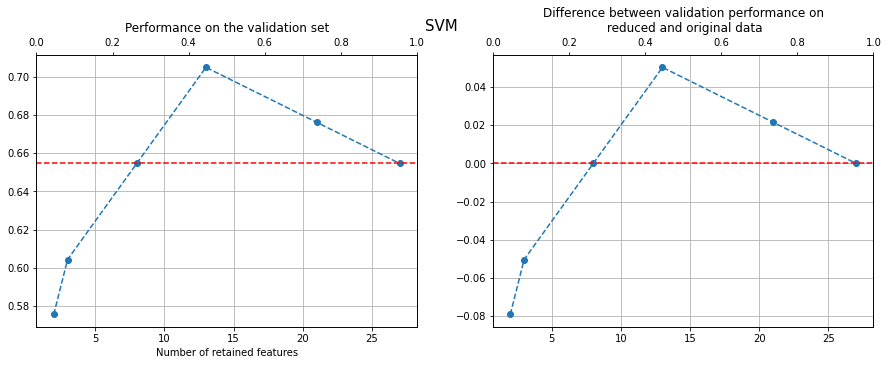

In [113]:
experiment_results_ji = run_feature_selection_experiments(
    df_trainval_ji,
    df_train_ji,
    df_validation_ji,
    df_test_ji,
    {
        'chi2': chi2,
        'mutual information': mutual_info_classif,
        'ANOVA': f_classif
    }
)

====== VVV RUNNING chi2 VVV ======
Fitting Random forest
Fitting SVM
====== VVV RUNNING mutual information VVV ======
Fitting Random forest
Fitting SVM
====== VVV RUNNING ANOVA VVV ======
Fitting Random forest
Fitting SVM


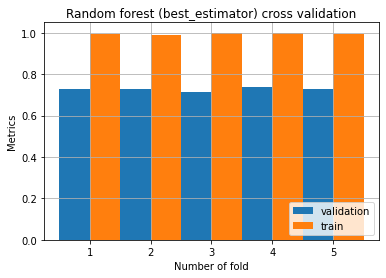

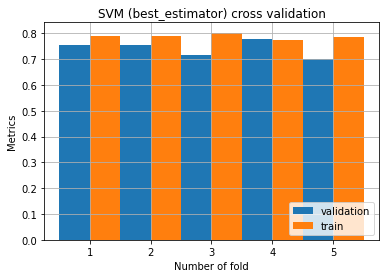

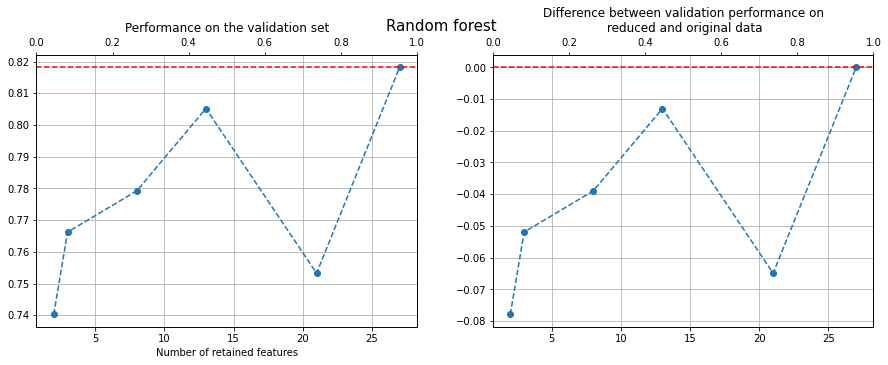

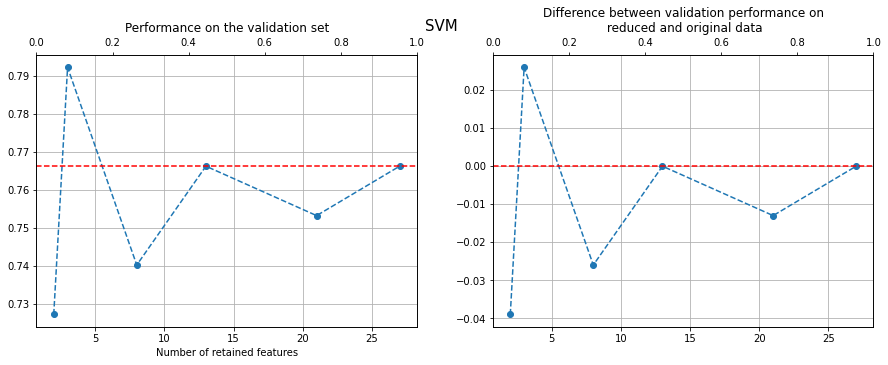

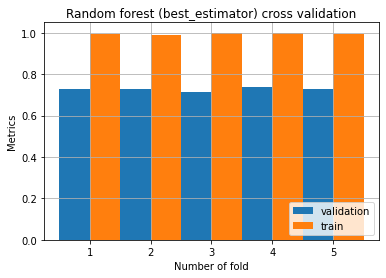

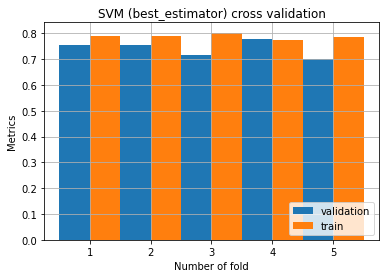

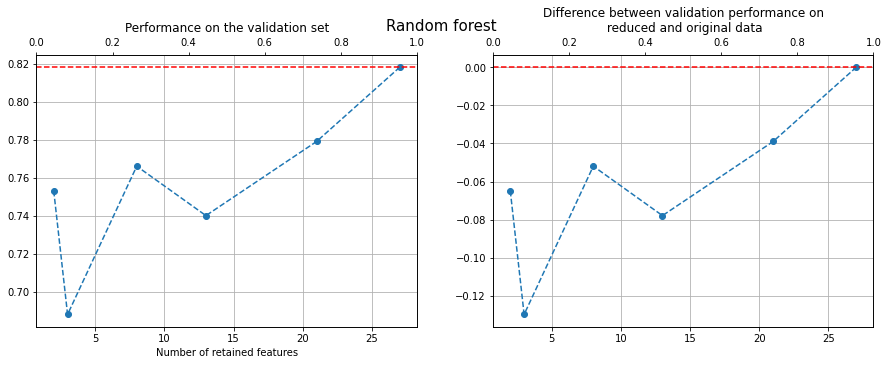

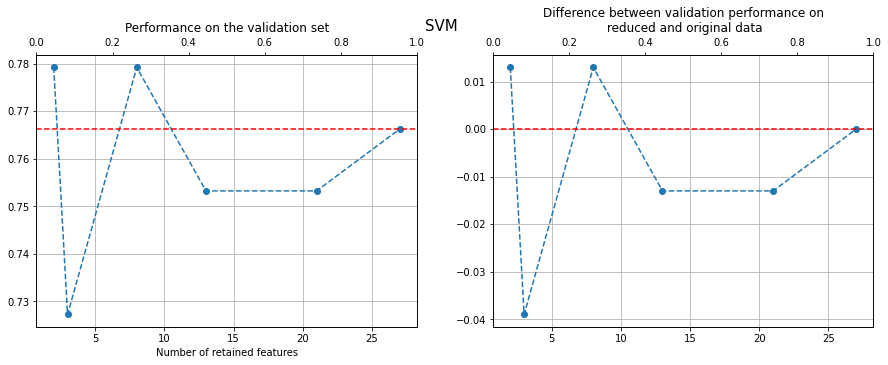

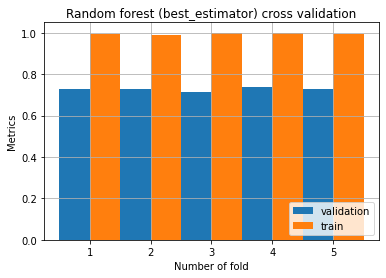

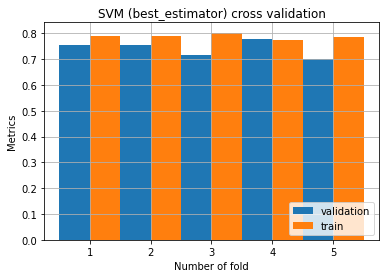

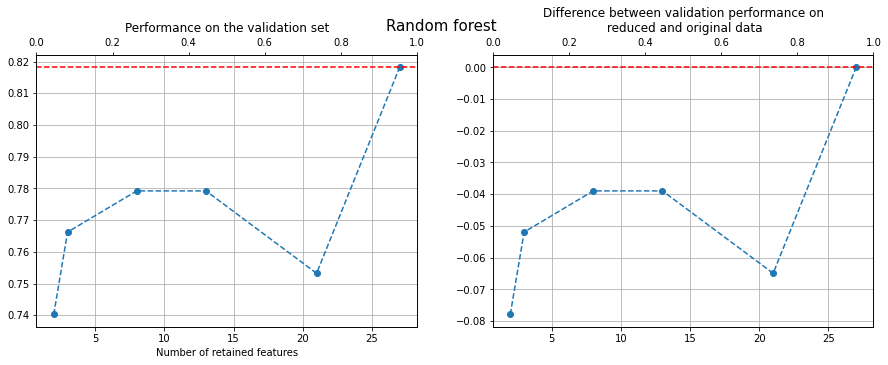

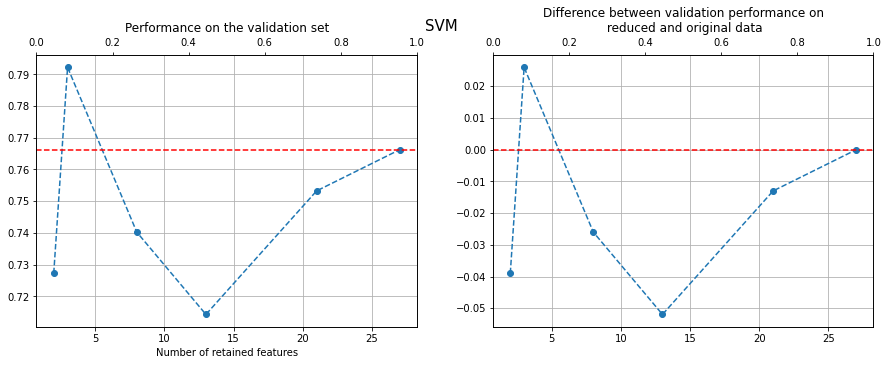

In [114]:
experiment_results_cc = run_feature_selection_experiments(
    df_trainval_cc,
    df_train_cc,
    df_validation_cc,
    df_test_cc,
    {
        'chi2': chi2,
        'mutual information': mutual_info_classif,
        'ANOVA': f_classif
    }
)

# 2 PRMQ

## Download the data

In [61]:
dataset = read_data(
    datasets_folder_path,
    '2. PRMQ'
)

dataset.head(1)

PRMQ_PR_SH_CU1  PRMQ_RE _LO_ENV2   PRMQ_PR_SH_ENV3  PRMQ_RE_SH_CU4  \
0               4                 3                 2               4   

   PRMQ_PR_LO_CU5  PRMQ_RE_SH_ENV6  PRMQ_PR_LO_ENV7  PRMQ_RE_LO_CU8  \
0               4                2                3               2   

   PRMQ_RE_LO_ENV9  PRMQ_PR_SH_ENV10  PRMQ _RE_SH_CU11  PRMQ_PR_LO_ENV12  \
0                3                 3                 4                 4   

   PRMQ _RE_SH_ENV13  PRMQ _PR_LO_CU14  PRMQ_RE_LO_CU15  PRMQ_PR_SH_CU16  \
0                  2                 4                4                4   

  CONDITION  
0         H

## Quick look and check the data

### Data clean check

In [62]:
check_data(dataset)

### Class balance

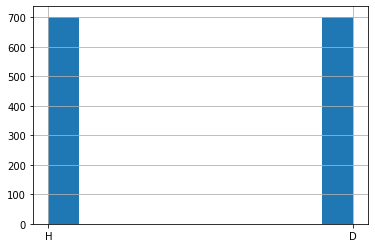

In [63]:
dataset['CONDITION'].hist()

assert len(dataset.loc[dataset['CONDITION'] == 'H', :]) \
    == len(dataset.loc[dataset['CONDITION'] == 'D', :])

## Create trainval + test + psychological sets

### Data sampling for the model

In [64]:
from sklearn.model_selection import train_test_split


df_trainval, df_test = train_test_split(
    dataset,
    random_state=RANDOM_STATE,
    train_size=TRAINVAL_SIZE,
    stratify=dataset['CONDITION']
)

check_split_correctness(df_trainval, 'CONDITION', eps_=0.001)
check_split_correctness(df_test, 'CONDITION', eps_=0.01)

df_trainval.shape, df_test.shape

((1123, 17), (281, 17))

In [65]:
df_train, df_validation = train_test_split(
    df_trainval,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE,
    stratify=df_trainval['CONDITION']
)


check_split_correctness(df_train, 'CONDITION')
check_split_correctness(df_validation, 'CONDITION')

df_train.shape, df_validation.shape

((898, 17), (225, 17))

### Data sampling for psychological insights

In [66]:
df_sample = prepare_sample(
    dataset,
    sample_size_=PSYCHOLOGIC_SAMPLE_SIZE,
    random_state_=RANDOM_STATE
)

verify_sample_correctness(dataset, df_sample)
df_sample.head()

PRMQ_PR_SH_CU1  PRMQ_RE _LO_ENV2   PRMQ_PR_SH_ENV3  PRMQ_RE_SH_CU4  \
493               5                 2                 3               3   
164               2                 2                 2               2   
54                3                 1                 3               3   
641               1                 3                 1               1   
607               1                 2                 1               1   

     PRMQ_PR_LO_CU5  PRMQ_RE_SH_ENV6  PRMQ_PR_LO_ENV7  PRMQ_RE_LO_CU8  \
493               1                5                4               5   
164               2                2                3               3   
54                4                1                4               2   
641               1                1                1               1   
607               3                4                1               1   

     PRMQ_RE_LO_ENV9  PRMQ_PR_SH_ENV10  PRMQ _RE_SH_CU11  PRMQ_PR_LO_ENV12  \
493                3                 5                 4                 3   
164                2                 2                 2                 2   
54                 2                 2                 2                 3   
641                2                 1                 2                 2   
607                2                 2                 2                 2   

     PRMQ _RE_SH_ENV13  PRMQ _PR_LO_CU14  PRMQ_RE_LO_CU15  PRMQ_PR_SH_CU16  \
493                  1                 3                3                5   
164                  1                 2                1                2   
54                   1                 5                1                4   
641                  1                 1                1                1   
607                  1                 2                1                1   

    CONDITION  
493         H  
164         H  
54          H  
641         H  
607         H

## Data exploration (on train set only)

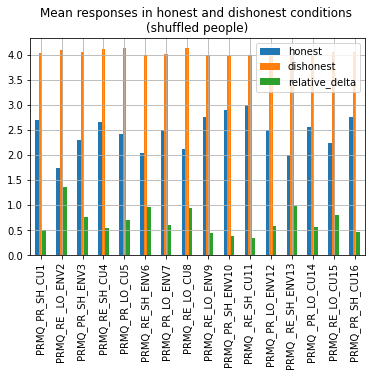

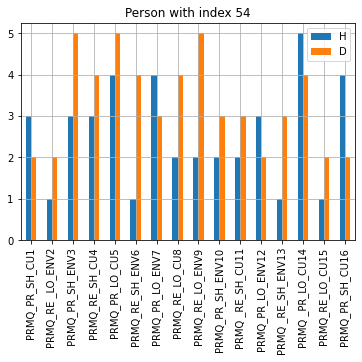

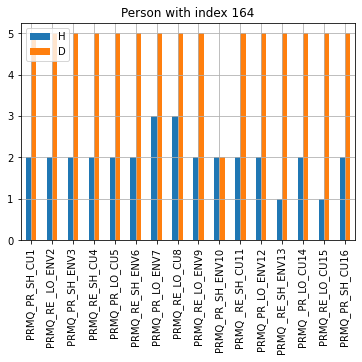

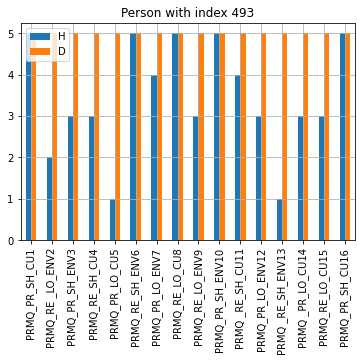

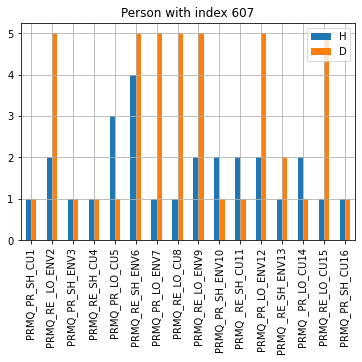

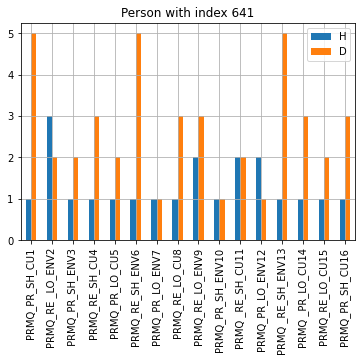

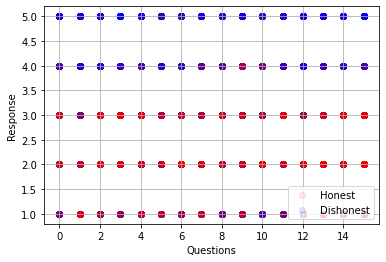

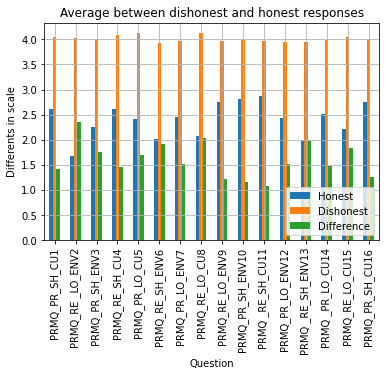

In [67]:
plot_insights(df_train, df_sample)

## Problem statement

Fitting SVM
Fitting Random forest
Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
SVM                          0.908058       0.00288707                   0.896694           0.0177096
Random forest                0.99911        0.000445187                  0.92344            0.0207177


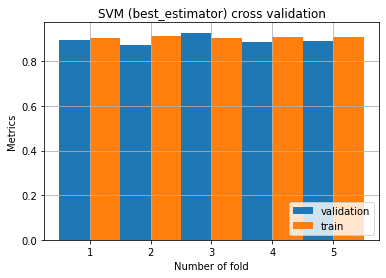

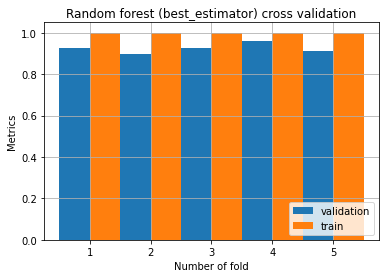

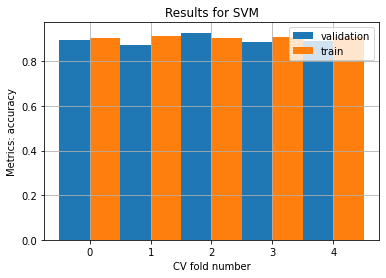

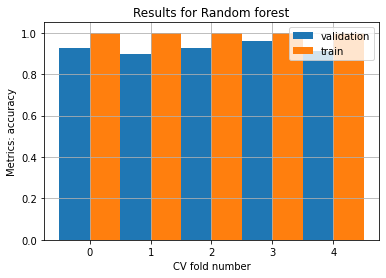

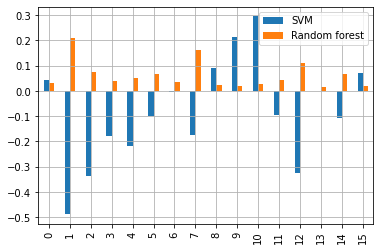

In [68]:
plot_problem_statement(df_trainval)

## Robust feature selection

====== VVV RUNNING chi2 VVV ======
Fitting Random forest
Fitting SVM
====== VVV RUNNING mutual information VVV ======
Fitting Random forest
Fitting SVM
====== VVV RUNNING ANOVA VVV ======
Fitting Random forest
Fitting SVM


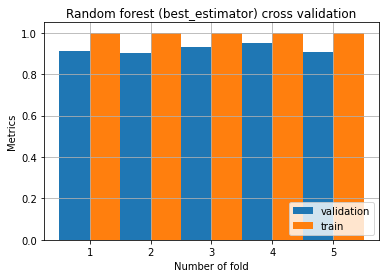

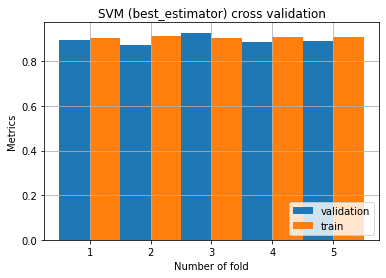

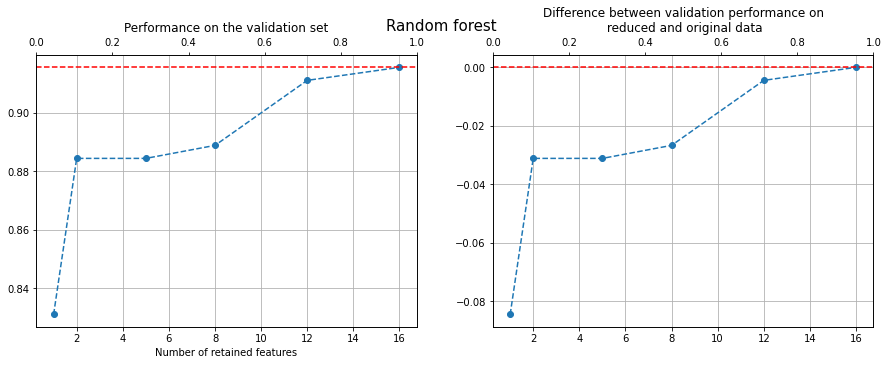

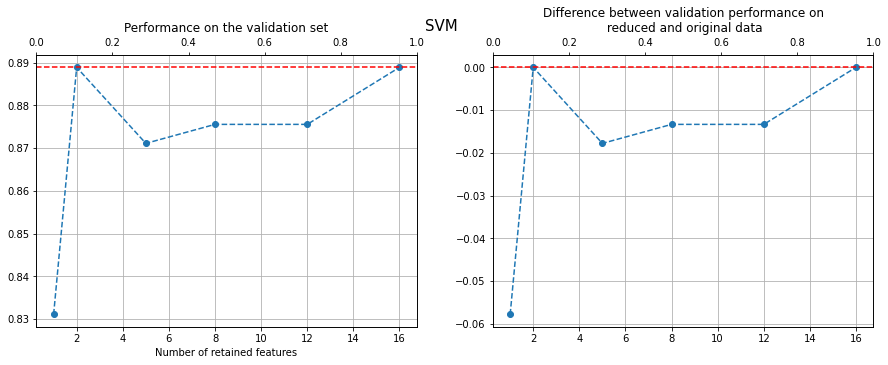

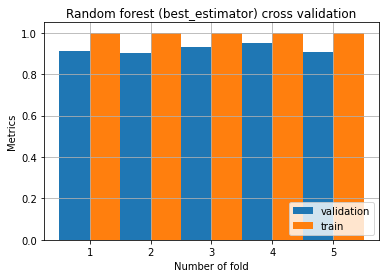

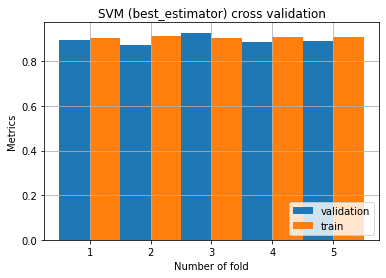

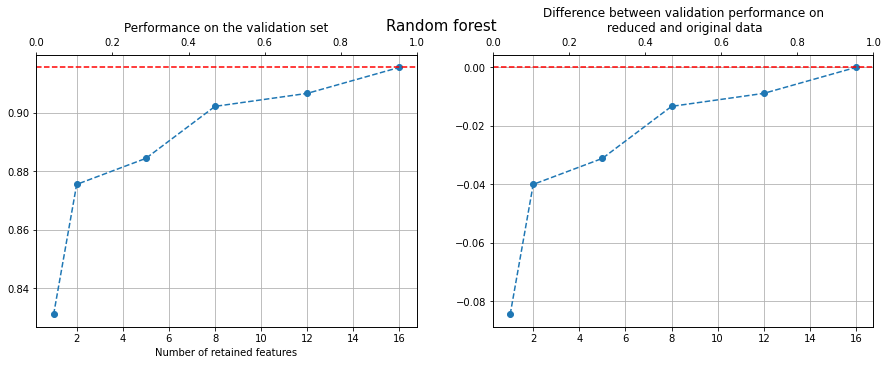

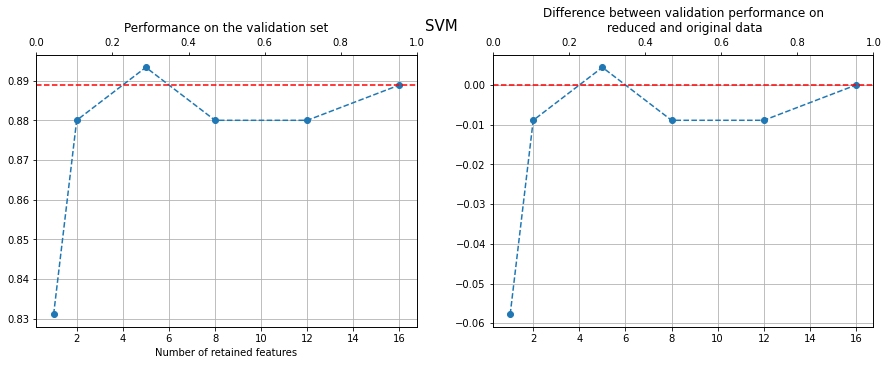

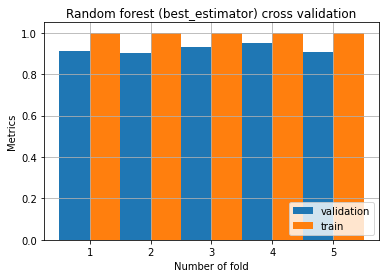

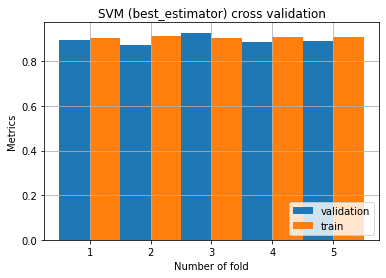

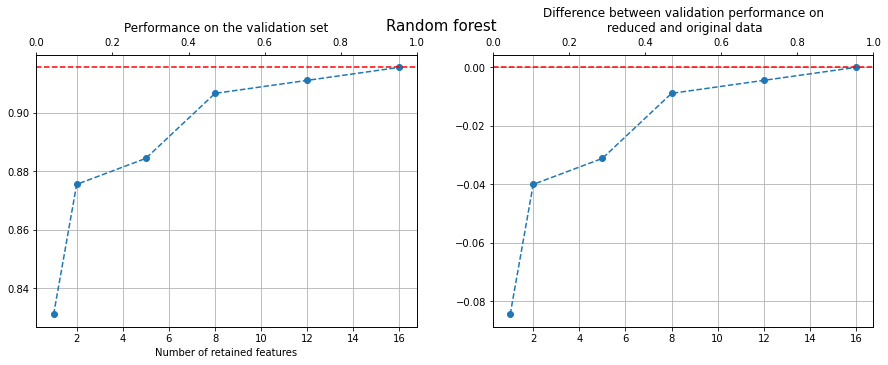

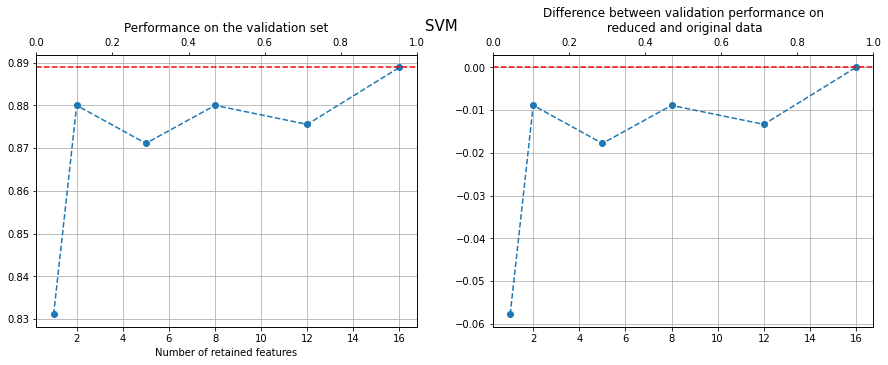

In [69]:
experiment_results = run_feature_selection_experiments(
    df_trainval,
    df_train,
    df_validation,
    df_test,
    {
        'chi2': chi2,
        'mutual information': mutual_info_classif,
        'ANOVA': f_classif
    }
)

## Finding secret features

Data shape before reduction: (1123, 16)
Data shape after reduction: (1123, 5)

        Mean cross-validation accuracy:
        On full data:
        0.919873015873016,
        On reduced data:
        0.8869325396825397
        Principal features indices:
        [ 1 12  7  5 14]
        


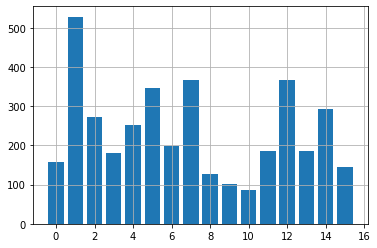

In [70]:
main_features = find_main_features(
    n_features_=5,
    feature_selection_function_=chi2,
    X_=experiment_results['chi2']['trainval_processed'][0],
    Y_=experiment_results['chi2']['trainval_processed'][1],
    sklearn_model_=experiment_results['chi2'][
        'grid_search_results']['Random forest'].best_estimator_
)

In [71]:
main_feature_names = get_feature_names(
    experiment_results['chi2']['trainval_processed'][0],
    df_trainval,
    main_features
)
main_feature_names

Index(['PRMQ_RE _LO_ENV2', 'PRMQ _RE_SH_ENV13', 'PRMQ_RE_LO_CU8',
       'PRMQ_RE_SH_ENV6', 'PRMQ_RE_LO_CU15'],
      dtype='object')

In [74]:
report_outliers(
    df_trainval,
    main_feature_names[0]
)

visualize_clusters(
    df_trainval,
    main_feature_names[:3],
    figsize=(9, 6),
    elev=30,
    azim=60
)

Median of PRMQ_RE _LO_ENV2 dishonest: PRMQ_RE _LO_ENV2    5.0
dtype: float64
Median of PRMQ_RE _LO_ENV2 honest: PRMQ_RE _LO_ENV2    1.0
dtype: float64
Outliers % honest subset: 0.07
Outliers % dishonest subset: 0.12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4 NAQ_R

## Download the data

In [92]:
dataset = read_data(
    datasets_folder_path,
    '4. NAQ_R'
)

## Quick look and check the data

### Data clean check

In [ ]:
check_data(dataset)

### Class balance

In [ ]:
dataset.CONDITION.value_counts()

H    356
D    356
Name: CONDITION, dtype: int64

In [ ]:
dataset.shape

(712, 23)

In [ ]:
check_split_correctness(dataset, 'CONDITION')

## Create trainval + test + psychological sets

### Data sampling for the model

In [93]:
from sklearn.model_selection import train_test_split


df_trainval, df_test = train_test_split(
    dataset,
    train_size=TRAINVAL_SIZE,
    random_state=RANDOM_STATE,
    stratify=dataset['CONDITION']
)

check_split_correctness(df_trainval, 'CONDITION')
check_split_correctness(df_test, 'CONDITION')

df_trainval.shape, df_test.shape

((569, 23), (143, 23))

In [94]:
df_train, df_validation = train_test_split(
    df_trainval,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE,
    stratify=df_trainval['CONDITION']
)

check_split_correctness(df_train, 'CONDITION')
check_split_correctness(df_validation, 'CONDITION')

df_train.shape, df_validation.shape

((455, 23), (114, 23))

### Data sampling for psychological insights

In [95]:
df_sample = prepare_sample(
    dataset,
    sample_size_=PSYCHOLOGIC_SAMPLE_SIZE,
    random_state_=RANDOM_STATE
)

verify_sample_correctness(dataset, df_sample)
df_sample.head()

NAQ-R_WR_1  NAQ-R_PR_2  NAQ-R_WR_3  NAQ-R_WR_4  NAQ-R_PR_5  NAQ-R_PR_6  \
227           1           1           1           1           2           1   
42            1           1           3           1           1           1   
256           3           3           1           1           3           3   
182           1           1           4           1           3           1   
56            1           1           4           4           1           1   

     NAQ-R_PR_7  NAQ-R_PI_8  NAQ-R_PI_9  NAQ-R_WR_10  ...  NAQ-R_PR_14  \
227           1           2           1            1  ...            2   
42            1           1           1            1  ...            1   
256           1           3           1            1  ...            1   
182           3           2           1            1  ...            3   
56            1           1           1            1  ...            1   

     NAQ-R_PI_15  NAQ-R_WR_16  NAQ-R_PR_17  NAQ-R_WR_18  NAQ-R_WR_19  \
227            1            2            1            2            2   
42             1            1            1            1            1   
256            1            2            1            1            2   
182            1            1            3            5            1   
56             1            2            1            1            1   

     NAQ-R_PR_20  NAQ-R_WR_21  NAQ-R_PI_22  CONDITION  
227            1            1            1          H  
42             1            1            1          H  
256            2            2            1          H  
182            1            2            1          H  
56             1            2            1          H  

[5 rows x 23 columns]

## Data exploration (on train set only)

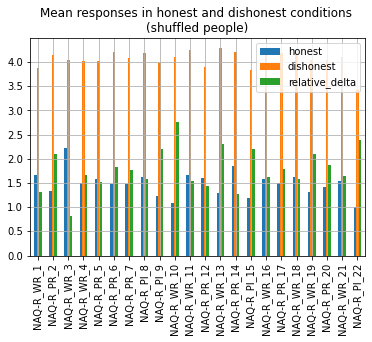

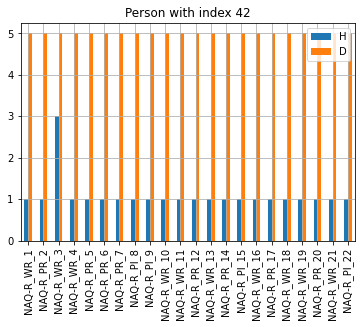

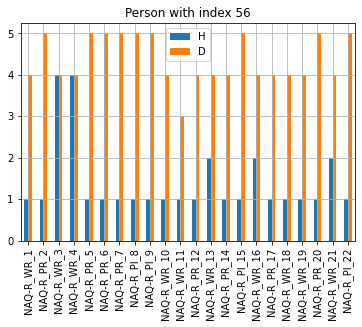

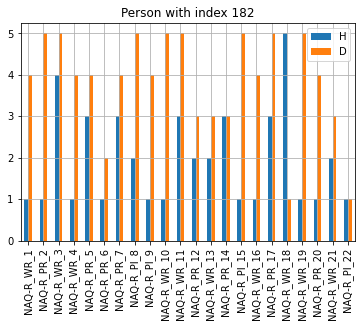

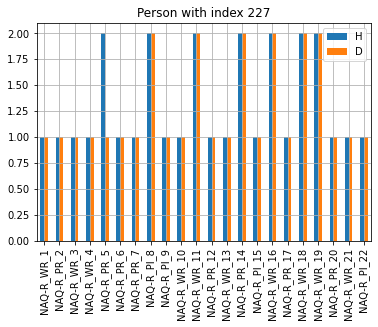

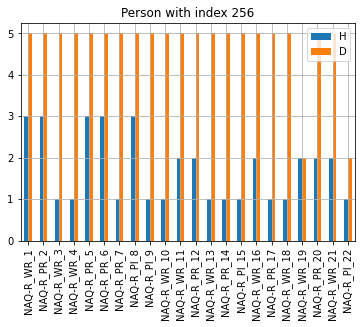

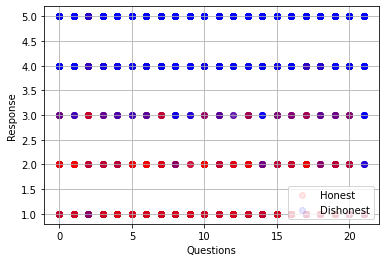

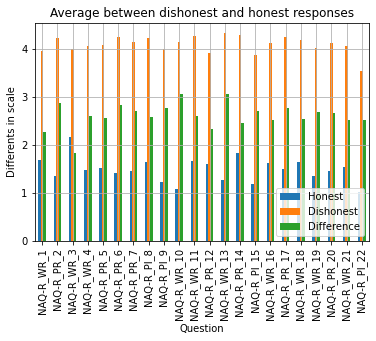

In [ ]:
plot_insights(df_train, df_sample)

## Problem statement

Fitting SVM
Fitting Random forest
Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
Random forest                0.988577        0.00255911                  0.942028           0.0180028
SVM                          0.956066        0.00535646                  0.949092           0.0262179


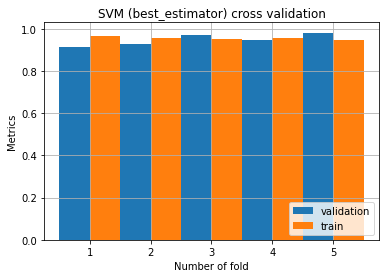

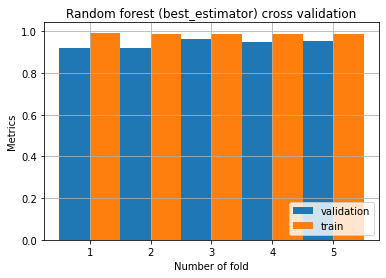

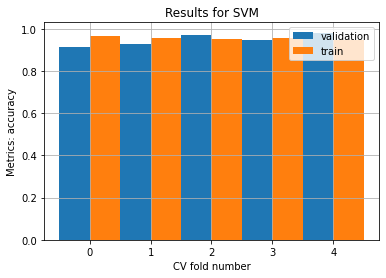

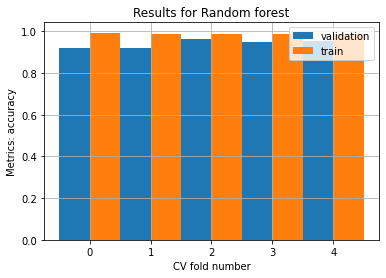

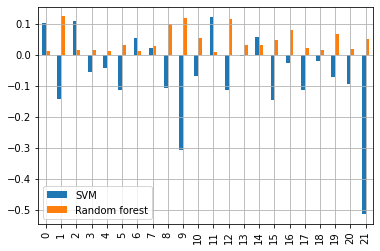

In [82]:
plot_problem_statement(
    df_trainval
)

## Robust feature selection

====== VVV RUNNING chi2 VVV ======
Fitting Random forest
Fitting SVM
====== VVV RUNNING mutual information VVV ======
Fitting Random forest
Fitting SVM
====== VVV RUNNING ANOVA VVV ======
Fitting Random forest
Fitting SVM


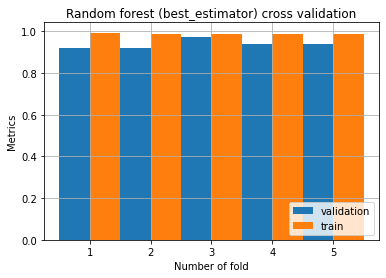

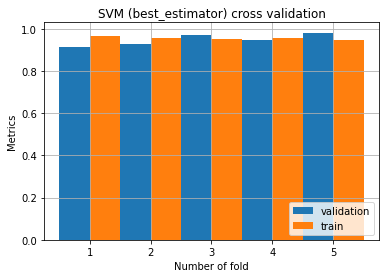

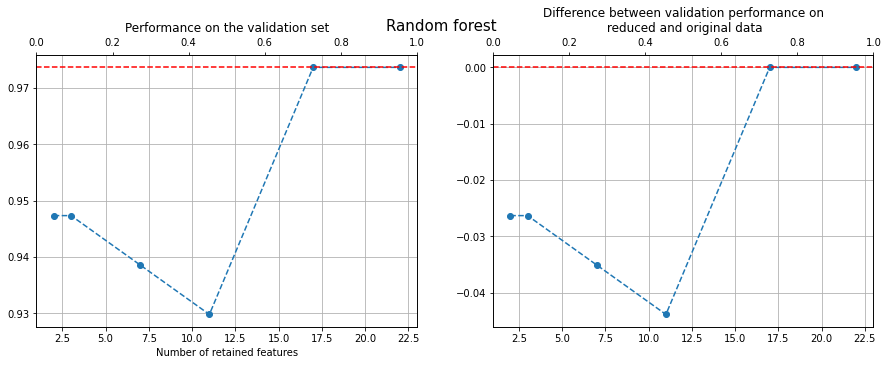

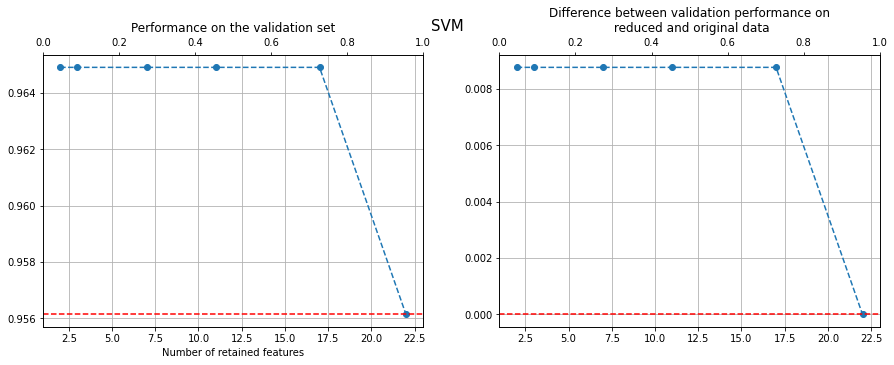

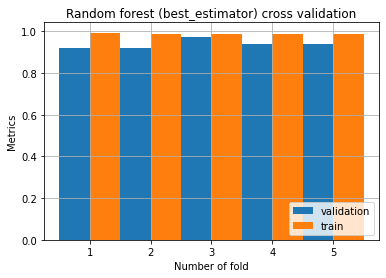

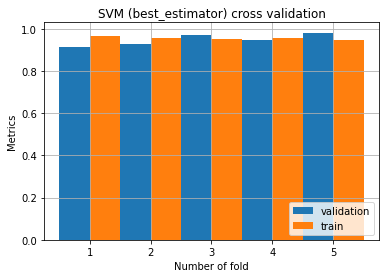

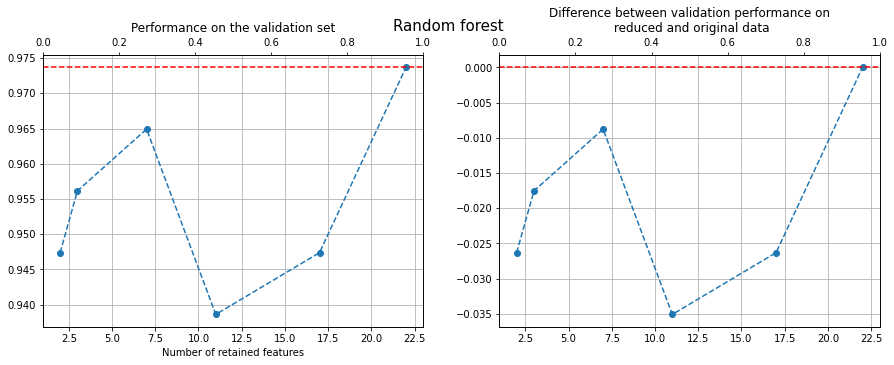

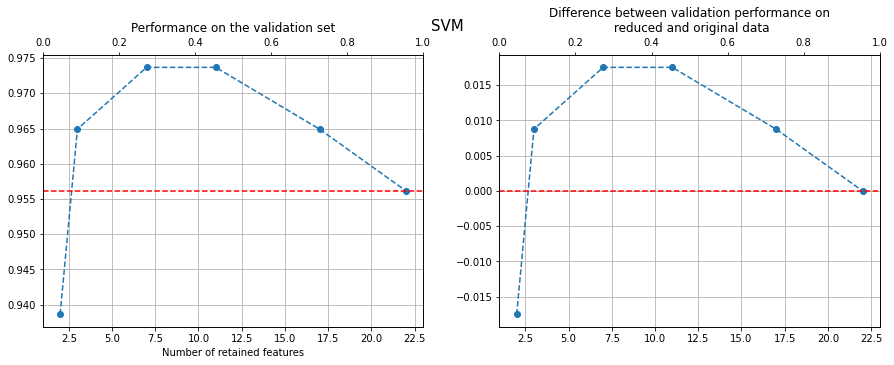

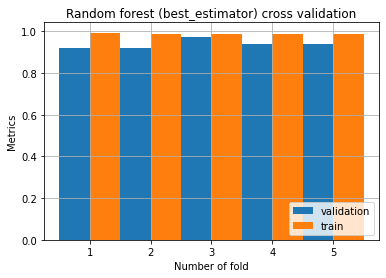

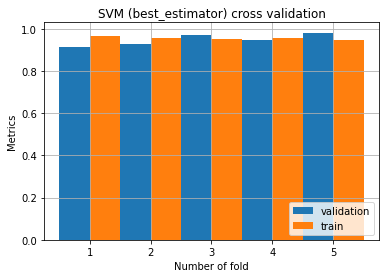

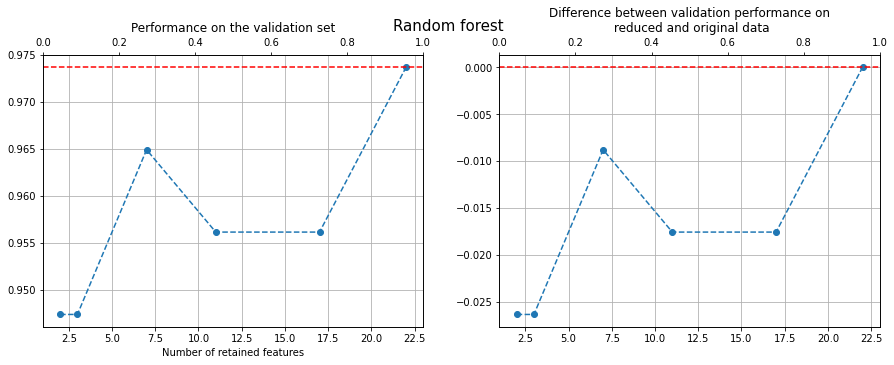

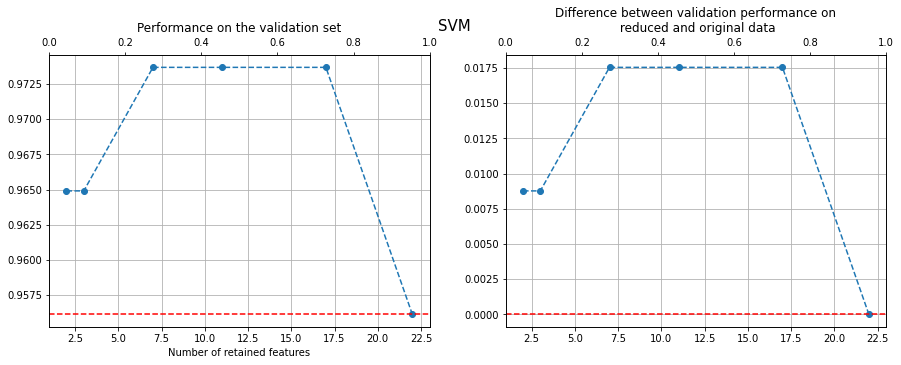

In [96]:
experiment_results = run_feature_selection_experiments(
    df_trainval,
    df_train,
    df_validation,
    df_test,
    {
        'chi2': chi2,
        'mutual information': mutual_info_classif,
        'ANOVA': f_classif
    }
)

## Finding secret feature

Data shape before reduction: (569, 22)
Data shape after reduction: (569, 5)

        Mean cross-validation accuracy:
        On full data:
        0.9384878124514827,
        On reduced data:
        0.943828598043782
        Principal features indices:
        [ 9 12  1  8 14]
        


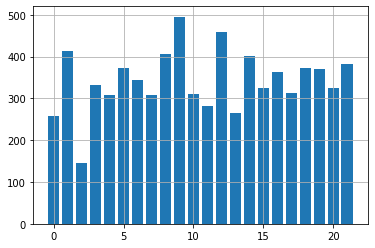

In [98]:
main_features = find_main_features(
    n_features_=5,
    feature_selection_function_=chi2,
    X_=experiment_results['chi2']['trainval_processed'][0],
    Y_=experiment_results['chi2']['trainval_processed'][1],
    sklearn_model_=experiment_results['chi2'][
        'grid_search_results']['Random forest'].best_estimator_
)

Index(['NAQ-R_WR_10', 'NAQ-R_WR_13', 'NAQ-R_PR_2', 'NAQ-R_PI_9',
       'NAQ-R_PI_15'],
      dtype='object')
Median of NAQ-R_WR_10 dishonest: NAQ-R_WR_10    5.0
dtype: float64
Median of NAQ-R_WR_10 honest: NAQ-R_WR_10    1.0
dtype: float64
Outliers % honest subset: 0.08
Outliers % dishonest subset: 0.12


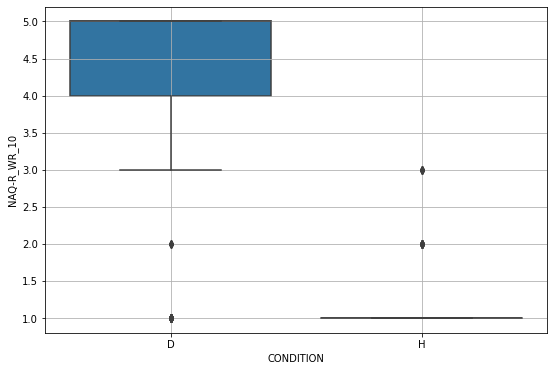

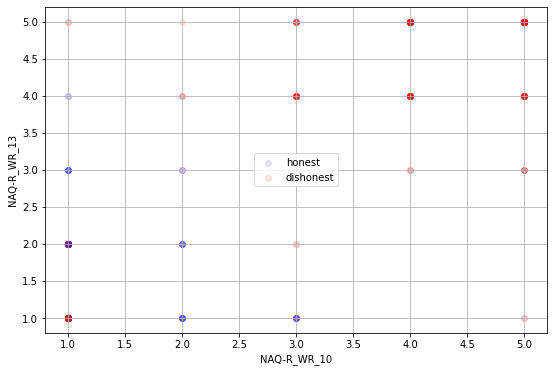

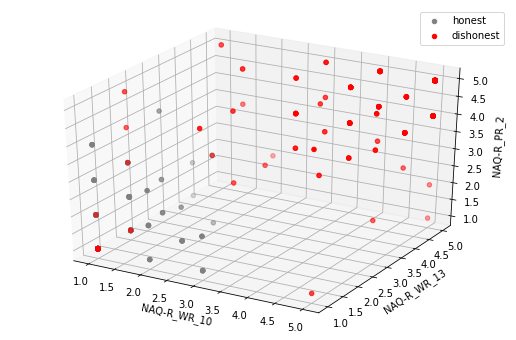

In [99]:
main_feature_names = get_feature_names(
    experiment_results['chi2']['trainval_processed'][0],
    df_trainval,
    main_features
)
print(main_feature_names)

report_outliers(
    df_trainval,
    main_feature_names[0]
)

visualize_clusters(
    df_trainval,
    main_feature_names[:3],
    figsize=(9, 6)
)

# 5 PHQ9_GAD7

## Download the data

In [64]:
dataset = read_data(
    datasets_folder_path,
    '5. PHQ9_GAD7'
)

pep8(_ih)

In [65]:
dataset.head()

PHQ1  PHQ2  PHQ3  PHQ4  PHQ5  PHQ6  PHQ7  PHQ8  PHQ9  GAD1  GAD2  GAD3  \
0     3     1     1     3     1     1     2     1     2     2     3     2   
1     2     1     3     3     1     1     3     1     5     3     3     3   
2     3     2     2     3     4     3     2     2     2     3     2     3   
3     2     2     4     3     2     4     1     4     4     2     4     4   
4     2     2     5     2     4     3     4     2     4     3     2     5   

   GAD4  GAD5  GAD6  GAD7 CONDITION  
0     2     2     3     2         H  
1     2     1     3     5         H  
2     3     3     3     3         H  
3     1     1     1     3         H  
4     3     1     5     2         H

## Quick look & check the data

In [31]:
dataset.describe()

PHQ1         PHQ2         PHQ3         PHQ4         PHQ5  \
count  1118.000000  1118.000000  1118.000000  1118.000000  1118.000000   
mean      3.252236     3.017889     3.538462     3.588551     3.313953   
std       1.470348     1.662597     1.421741     1.329620     1.504634   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     1.000000     2.000000     3.000000     2.000000   
50%       3.000000     3.000000     4.000000     4.000000     4.000000   
75%       5.000000     5.000000     5.000000     5.000000     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

              PHQ6         PHQ7         PHQ8         PHQ9         GAD1  \
count  1118.000000  1118.000000  1118.000000  1118.000000  1118.000000   
mean      3.164580     2.967800     2.903399     3.265653     3.570662   
std       1.584876     1.649948     1.652855     1.619626     1.387345   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     1.000000     1.000000     1.000000     2.000000   
50%       3.000000     3.000000     3.000000     4.000000     4.000000   
75%       5.000000     5.000000     5.000000     5.000000     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

              GAD2         GAD3         GAD4         GAD5         GAD6  \
count  1118.000000  1118.000000  1118.000000  1118.000000  1118.000000   
mean      3.722719     3.700358     3.118068     3.111807     3.445438   
std       1.265209     1.271765     1.586767     1.552721     1.340830   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.000000     3.000000     1.000000     2.000000     2.000000   
50%       4.000000     4.000000     3.000000     3.000000     4.000000   
75%       5.000000     5.000000     5.000000     5.000000     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

              GAD7  
count  1118.000000  
mean      3.732558  
std       1.353742  
min       1.000000  
25%       3.000000  
50%       4.000000  
75%       5.000000  
max       5.000000

### Data clean check

In [32]:
check_data(dataset)

### Class balance

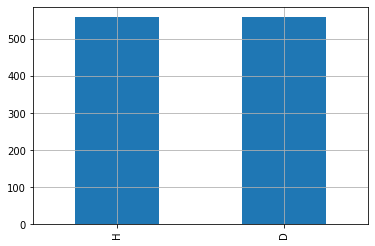

In [33]:
ax = dataset.CONDITION.value_counts().plot(kind='bar')
ax.grid()

## Create trainval + test + psychological sets

- Use stratified sampling, to support the same class balance in train, validation and test sets
- For training the model (and exploring the data for optimizing the model), we split the dataset into train, validation & test sets with train_test_split function of sklearn (which shuffles the dataset and disrupts the initial structure)
- For gaining psychological insights, we sample the exploration set out of the initial set, **complying with the initial structure** (e.g. if we sample 50% of the dataset --> the sampled data contains honest and dishonest response of the same people, and the structure of the dataset is the same)

### Data sampling for the model

In [66]:
df_trainval, df_test = train_test_split(
    dataset,
    train_size=TRAINVAL_SIZE,
    random_state=RANDOM_STATE,
    stratify=dataset.CONDITION
)

print(df_trainval.shape, df_test.shape)

pep8(_ih)

(894, 17) (224, 17)



In [67]:
df_train, df_validation = train_test_split(
    df_trainval,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE,
    stratify=df_trainval.CONDITION
)

print(df_train.shape, df_validation.shape)



check_split_correctness(df_train, 'CONDITION')

pep8(_ih)

(715, 17) (179, 17)
cell_content.py:12:1: E303 too many blank lines (3)



### Data sampling for psychological insights

In [68]:
df_sample = prepare_sample(
    dataset,
    sample_size_=PSYCHOLOGIC_SAMPLE_SIZE,
    random_state_=RANDOM_STATE
)

verify_sample_correctness(dataset, df_sample)
df_sample.head()

PHQ1  PHQ2  PHQ3  PHQ4  PHQ5  PHQ6  PHQ7  PHQ8  PHQ9  GAD1  GAD2  GAD3  \
158     3     3     4     4     3     2     3     2     1     4     3     4   
451     2     1     2     2     1     2     1     1     1     2     2     1   
55      2     1     4     3     2     1     2     1     5     2     3     2   
247     2     1     2     2     2     1     2     1     1     1     3     3   
70      1     1     2     2     1     1     2     2     5     1     3     2   

     GAD4  GAD5  GAD6  GAD7 CONDITION  
158     4     1     4     5         H  
451     2     4     2     1         H  
55      2     1     3     4         H  
247     3     1     1     2         H  
70      1     1     2     3         H

## Data exploration (on train set only)

### Insight №1 - Averaged across patients, relative change in response for malinglers is from 46% to 197% (exaggerated)

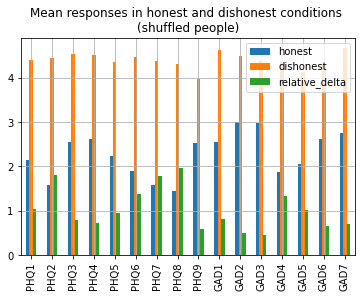

In [37]:
_ = plot_averaged_question_responses(df_train)

### Insight №2 - what happens for a concrete person, without averaging? Some people try to fake, others - simply maximize all responses. Tendency to exaggarate is true

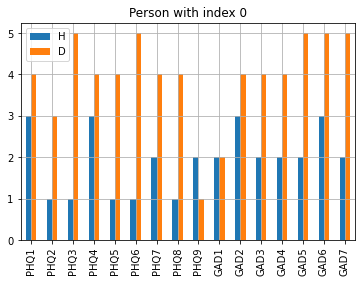

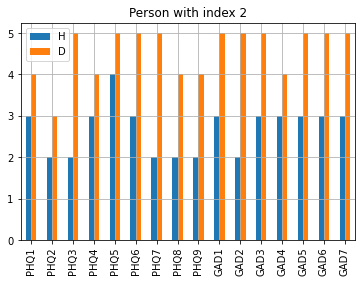

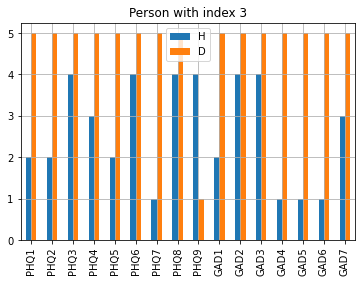

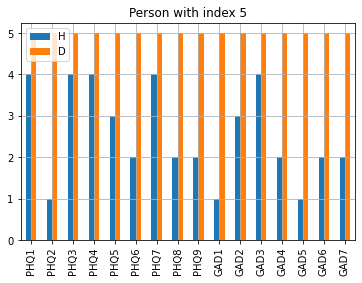

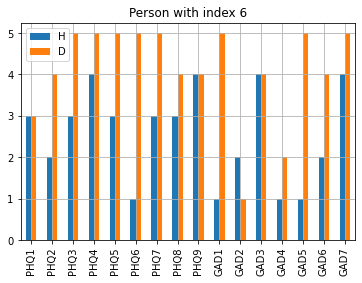

In [38]:
plot_person_response(
    df_sample,
    np.unique(df_sample.index)[:5]
)

### Insight № 3 - average elevation in dishonest response is around 2-3 points

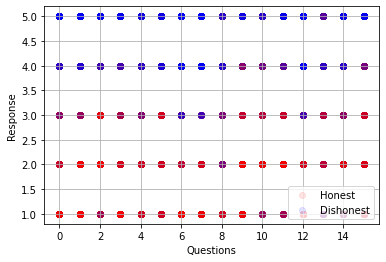

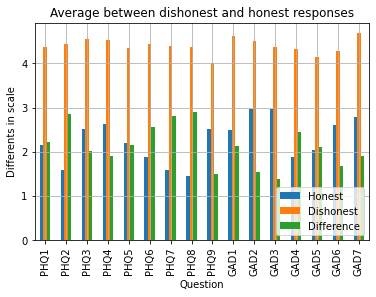

In [39]:
plot_dishonest_responses(df_sample)

## Problem statement

Fitting SVM
Fitting Random forest
Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
Random forest                1               0                           0.988802          0.00793622
SVM                          0.994966        0.00189808                  0.989932          0.00741339


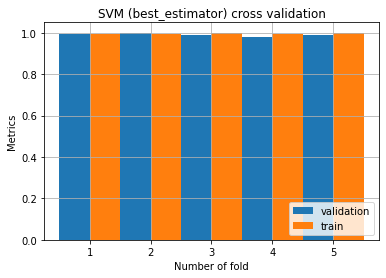

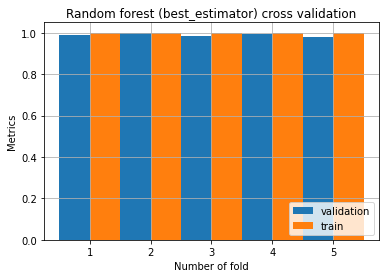

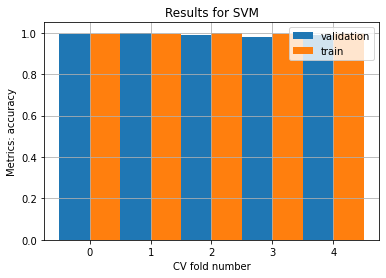

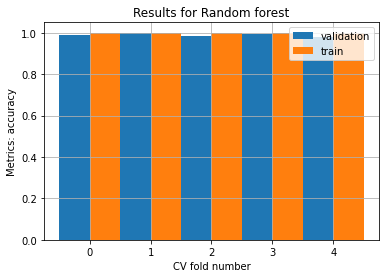

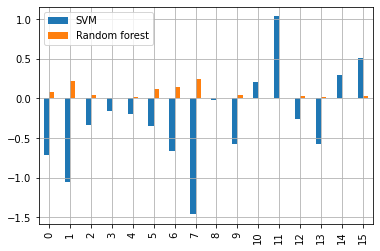

In [40]:
plot_problem_statement(
    df_trainval
)

In [41]:
df_trainval.shape[1]

17

## Data preprocessing

In [69]:
target_column = 'CONDITION'

question_columns = df_train.columns[
    df_train.columns != target_column
]

# questions_pipeline = Pipeline(
#     []  # empty
# )

target_pipeline = Pipeline(
    [
        ('encode', OrdinalEncoder())  # categories=[['H', 'D']]))
    ]
)

pep8(_ih)

In [74]:
preprocessor = ColumnTransformer(
    [
        # ('questions', questions_pipeline, question_columns),
        ('target', target_pipeline, [target_column])
    ],
    remainder='passthrough'
)

- Fit & transform on training set
- Only transform on the validation and test sets

In [75]:
df_train_processed = preprocessor.fit_transform(df_train)
df_validation_processed = preprocessor.transform(df_validation)
df_test_processed = preprocessor.transform(df_test)

In [76]:
df_trainval_processed = preprocessor.fit_transform(df_trainval)

In [77]:
X_train_processed, Y_train_processed = \
    get_X_Y(df_train_processed)

X_validation_processed, Y_validation_processed = \
    get_X_Y(df_validation_processed)

X_test_processed, Y_test_processed = \
    get_X_Y(df_test_processed)

X_trainval_processed, Y_trainval_processed = \
    get_X_Y(df_trainval_processed)

## Model selection

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [48]:
random_forest_model = Model(
    RandomForestClassifier(),
    'Random forest',
    {
        'n_estimators': [1, 2, 5, 10],
        'max_depth': [1, 2, 3],
        'random_state': [RANDOM_STATE],
    },
    {
        'n_estimators': [i for i in range(1, 5)],
        'max_depth': [i for i in range(3)],
        'random_state': [RANDOM_STATE]
    }
)

In [49]:
svm_model = Model(
    SVC(),
    'SVM',
    {
        'C': [0.1, 0.5, 1.0],
        'kernel': ['linear'],
        'random_state': [RANDOM_STATE]
     
    },
    {
        'C': [i * 0.1 for i in range(1, 11)] + [2, 5],
        'kernel': ['linear'],
        'random_state': [RANDOM_STATE]
    }
)

In [50]:
all_models = {
    model.name: model
    for model in [
        random_forest_model,
        svm_model
    ]
}

- As we see below, even without fine tuning, models handle the classification task fairly well, reaching 98.7% - 98.9% average accuracy on unseen folds, during cross validation
- Accuracy is a valid metrics, since the classes are balanced
- Thus, **random forest** and **svm classifier** could be shortlisted, if this was a performance-based competition

Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
SVM                          0.994686        0.00104787                  0.987691          0.00420087
Random forest                1               0                           0.988802          0.00793622


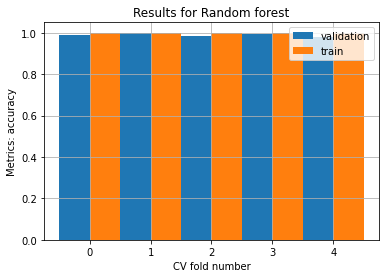

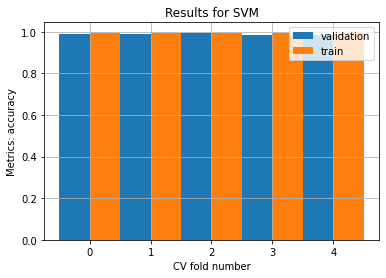

In [51]:
cv_results = plot_cv_results(
    {name: model.model for name, model in all_models.items()},
    X_=X_trainval_processed,
    Y_=Y_trainval_processed,
    cv_=5,
    scoring_='accuracy'
)

## Model fine-tuning

Fitting SVM
Fitting Random forest


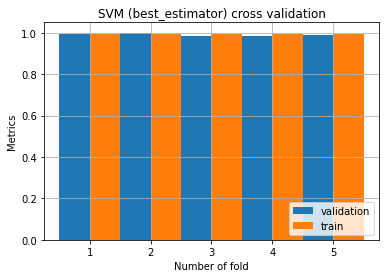

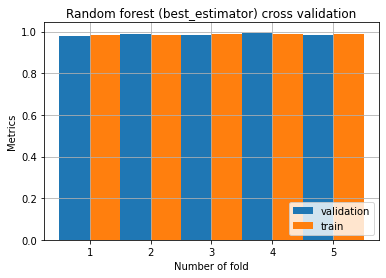

In [52]:
grid_search_results = fit_grid_search(
    models_dict_=dict_subset(
        all_models, ['SVM', 'Random forest']
    ),
    X_=X_trainval_processed,
    Y_=Y_trainval_processed,
    cv_=5,
    scoring_='accuracy'
)

Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
Random forest                0.986297        0.00137323                  0.985456          0.00570473
SVM                          0.993568        0.00167989                  0.989932          0.00651723


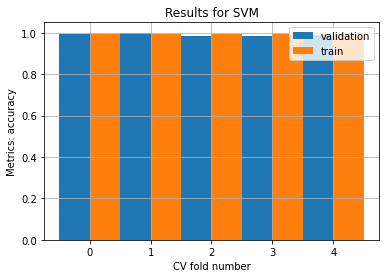

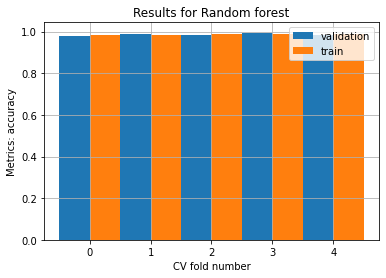

In [53]:
cv_results = plot_cv_results(
    {name: gs_res.best_estimator_ \
     for name, gs_res in grid_search_results.items()},
    X_=X_trainval_processed,
    Y_=Y_trainval_processed,
    cv_=5,
    scoring_='accuracy'
)

## Problem statement

- Below, we see: despite several models ensure high performance on the unseen data - the high classification preformance is achieved by utilizing different subsets of features

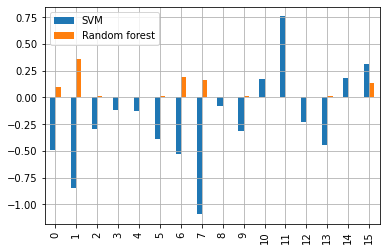

In [54]:
plot_feature_importances(
    grid_search_results
)

## Solutions for robust feature selection procedure

- Resources:
    - https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
    - https://machinelearningmastery.com/feature-selection-with-categorical-data/

- Feature selection - is a process of removing **non-informative** or **redundant** predictors
- Therefore, the questions are:
    - What is the **measure of usefulness / informativeness** of a feature?
    - How do different models define informativeness?
    - Why different models select varied subsets of features, that are considered useful?
    

**Feature selection**
- Unsupervised methods:
    - Ignore target variable (don't look at it)
    - Remove redundant predictors (e.g. removing the correlated predictors)
- Supervised methods:
    - Account for target variable
    - Remove irrelavant predictors
- Wrapper methods (e.g. Recursive Feature Elimination)
    - Create many models with different subsets of features, and select the subset, that provides the model with the highest performance
    - **Model-dependent method**
- Filter methods:
    - Uses statistics to evaluate relation between predictors and the target variable. Selects the features with the strongest relationship
    - **Model-independent method**
- Intrinsic feature selection methods:
    - Regards models, capable of internal feature selection during training (e.g. Lasso regression, decision trees)
    - **Model dependent method**
- Dimensionality reduction techniques
    - Instead of selecting features, these techniques *project the data into another space with fewer dimensionality*. We lose the original features.
- **Our conclusion**
    - We will focus on model-independent techniques: filter-based feature selection and dimensionality reduction
    - Since **models cannot be involved into robust feature selection**, we will focus on characteristics, encoding the relationship between predictors and the target variable
    - We will explain why different models select different subsets of meaningful features
    - The target metrics is: difference in classification performance metrics between two cases:
        - Performance, measured for a model, trained on the full dataset
        - Performance, measured for a model, trained on the data with selected features

**Our data**
- Input - categorical ordinal variables, because each has a fixed set of categories (1-5), given in the order of the symptoms' intensity
- Output - categorical binary variable
- According to the *How to choose a feature selection method for ML*, for categorical input and categorical output, the filter-based feature selection methods are:
    - Chi-squared testing
    - Mutual information
- Also, categorical input can be experimentally considered as numerical. This will let us use following methods for numerical input and categorical output:
    - ANOVA correlation coefficient
    - Kendall's rank coefficient

- SelectKBest
- SelectPercentile

- Our experiment scheme:
    1. Find best model, using grid search, on the full training data
    2. Calculate validation performance of the model above
    3. Fit feature selector on training dataset, transform train and validation datasets
    4. Train a model with the same parameters on the train dataset with selected features, and calculate validation metrics on the validation dataset with selected features
    5. Compare validation metrics of the models, trained on full set of features, and dataset with selected features. **Hyperparameters of the model are held the same**. We aim for the smallest difference possible, between these validation performance metrics

### Experiment with Chi-squared feature selection

In [55]:
svm_validation_results = calculate_validation_performance(
    grid_search_results['SVM'].best_estimator_,
    X_train_processed,
    Y_train_processed,
    X_validation_processed,
    Y_validation_processed,
    metrics_function_=accuracy_score,
    feature_selection_function_=chi2,
    percentiles_=[5, 10, 30, 50, 80, 100]
)

svm_validation_results

{'percentiles': [5, 10, 30, 50, 80, 100],
 'n_features': [1, 2, 5, 8, 12, 16],
 'metrics': [0.9553072625698324,
  0.9832402234636871,
  0.9832402234636871,
  0.994413407821229,
  0.9888268156424581,
  0.9888268156424581]}

In [56]:
random_forest_results = calculate_validation_performance(
    grid_search_results['Random forest'].best_estimator_,
    X_train_processed,
    Y_train_processed,
    X_validation_processed,
    Y_validation_processed,
    metrics_function_=accuracy_score,
    feature_selection_function_=chi2,
    percentiles_=[5, 10, 30, 50, 80, 100]
)

random_forest_results

{'percentiles': [5, 10, 30, 50, 80, 100],
 'n_features': [1, 2, 5, 8, 12, 16],
 'metrics': [0.9553072625698324,
  0.9776536312849162,
  0.9832402234636871,
  0.9888268156424581,
  0.9832402234636871,
  0.9720670391061452]}

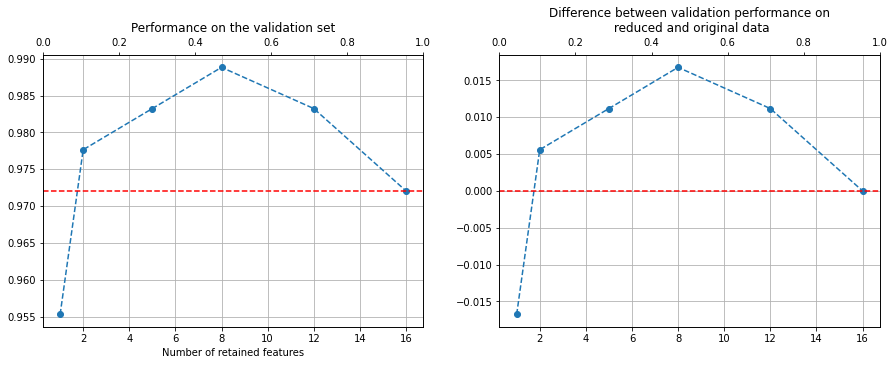

In [57]:
plot_validation_performance(
    random_forest_results,
)

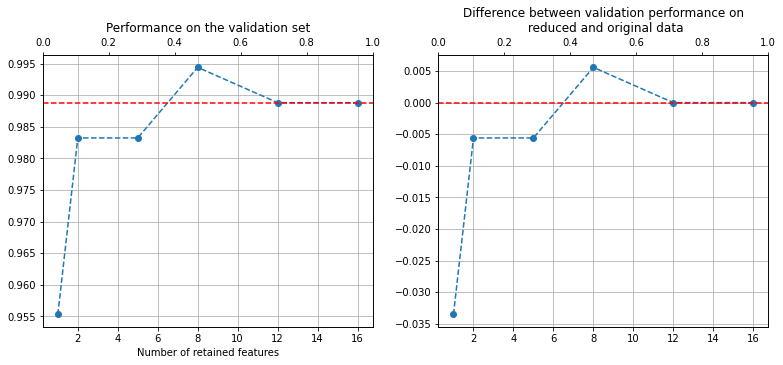

In [58]:
plot_validation_performance(
    svm_validation_results,
    figsize=(13, 5)
)

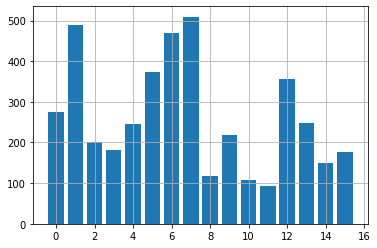

In [59]:
feature_selector = SelectPercentile(
    score_func=chi2,
    percentile=100
)

feature_selector.fit(X_train_processed, Y_train_processed)
plot_selector_feature_scores(feature_selector)

## Finding the secret feature

- What kind of feature is it, that alone allows for 90%-95% accuracy on the unseen data?

Data shape before reduction: (894, 16)
Data shape after reduction: (894, 5)

        Mean cross-validation accuracy:
        On full data:
        0.985456029125604,
        On reduced data:
        0.9787458414412153
        Principal features indices:
        [ 7  1  6  5 12]
        


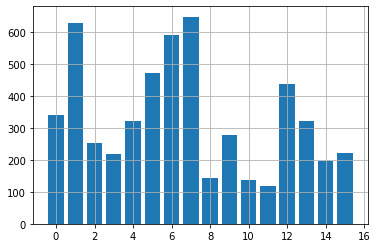

In [60]:
main_features = find_main_features(
    n_features_=5,
    feature_selection_function_=chi2,
    X_=X_trainval_processed,
    Y_=Y_trainval_processed,
    sklearn_model_=grid_search_results['Random forest'].best_estimator_
)

In [61]:
main_feature_names = get_feature_names(
    X_trainval_processed,
    df_trainval,
    main_features
)
main_feature_names

Index(['PHQ8', 'PHQ2', 'PHQ7', 'PHQ6', 'GAD4'], dtype='object')

Median of PHQ8 dishonest: PHQ8    5.0
dtype: float64
Median of PHQ8 honest: PHQ8    1.0
dtype: float64
Outliers % honest subset: 0.03
Outliers % dishonest subset: 0.04


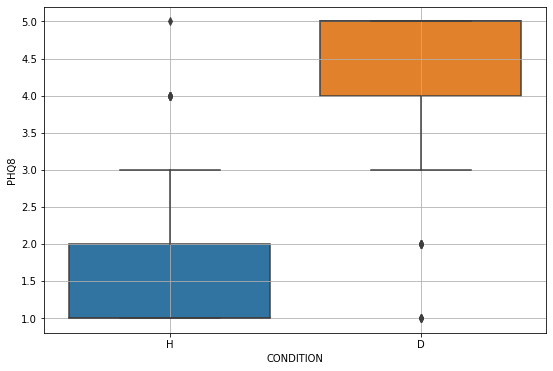

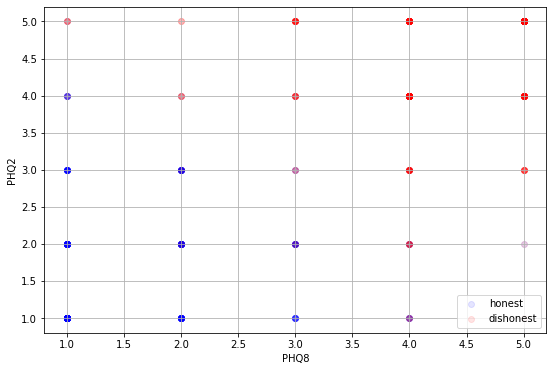

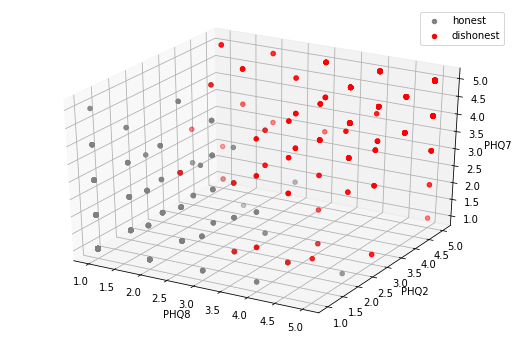

In [62]:
report_outliers(
    df_trainval,
    main_feature_names[0]
)

visualize_clusters(
    df_trainval,
    main_feature_names[:3],
    figsize=(9, 6)
)

# 6 PID5

## Download the data

In [ ]:
dataset = read_data(
    datasets_folder_path,
    '6. PID5'
)

['PID-5_test.pdf', 'PID5_df (1).gsheet', 'PID5_df.gsheet', 'PID5_df.xlsx', 'PID_5_Description.docx']


In [ ]:
# PROBLEM HERE!!!
dataset.head(1)

Q1;Q2;Q3;Q4;Q5;Q6;Q7;Q8;Q9;Q10;Q11;Q12;Q13;Q14;Q15;Q16;Q17;Q18;Q19;Q20;Q21;Q22;Q23;Q24;Q25;Q26;Q27;Q28;Q29;Q30;Q31;Q32;Q33;Q34;Q35;Q36;Q37;Q38;Q39;Q40;Q41;Q42;Q43;Q44;Q45;Q46;Q47;Q48;Q49;Q50;Q51;Q52;Q53;Q54;Q55;Q56;Q57;Q58;Q59;Q60;Q61;Q62;Q63;Q64;Q65;Q66;Q67;Q68;Q69;Q70;Q71;Q72;Q73;Q74;Q75;Q76;Q77;Q78;Q79;Q80;Q81;Q82;Q83;Q84;Q85;Q86;Q87;Q88;Q89;Q90;Q91;Q92;Q93;Q94;Q95;Q96;Q97;Q98;Q99;Q100;Q101;Q102;Q103;Q104;Q105;Q106;Q107;Q108;Q109;Q110;Q111;Q112;Q113;Q114;Q115;Q116;Q117;Q118;Q119;Q120;Q121;Q122;Q123;Q124;Q125;Q126;Q127;Q128;Q129;Q130;Q131;Q132;Q133;Q134;Q135;Q136;Q137;Q138;Q139;Q140;Q141;Q142;Q143;Q144;Q145;Q146;Q147;Q148;Q149;Q150;Q151;Q152;Q153;Q154;Q155;Q156;Q157;Q158;Q159;Q160;Q161;Q162;Q163;Q164;Q165;Q166;Q167;Q168;Q169;Q170;Q171;Q172;Q173;Q174;Q175;Q176;Q177;Q178;Q179;Q180;Q181;Q182;Q183;Q184;Q185;Q186;Q187;Q188;Q189;Q190;Q191;Q192;Q193;Q194;Q195;Q196;Q197;Q198;Q199;Q200;Q201;Q202;Q203;Q204;Q205;Q206;Q207;Q208;Q209;Q210;Q211;Q212;Q213;Q214;Q215;Q216;Q217;Q218;Q219;Q220;CONDITION
0  0;0;2;2;0;0;2;0;0;1;0;0;1;1;1;2;0;1;0;1;0;2;0;...

# 7 Short PID 5

## Download the data

In [ ]:
dataset = read_data(
    datasets_folder_path,
    '7. shortPID5'
)

## Quick look and check the data

### Data clean check

In [ ]:
check_data(dataset)

### Class balance

In [ ]:
check_split_correctness(dataset, 'CONDITION')

## Create trainval + test + psychological sets

### Data sampling for the model

In [ ]:
from sklearn.model_selection import train_test_split


df_trainval, df_test = train_test_split(
    dataset,
    train_size=TRAINVAL_SIZE,
    random_state=RANDOM_STATE,
    stratify=dataset['CONDITION']
)

check_split_correctness(df_trainval, 'CONDITION')
check_split_correctness(df_test, 'CONDITION')

df_trainval.shape, df_test.shape

((830, 26), (208, 26))

In [ ]:
df_train, df_validation = train_test_split(
    df_trainval,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE,
    stratify=df_trainval['CONDITION']
)

[check_split_correctness(df_, 'CONDITION') for df_ in [df_train, df_validation]]

[None, None]

### Data sampling for psychological insights

In [ ]:
df_sample = prepare_sample(
    dataset,
    sample_size_=PSYCHOLOGIC_SAMPLE_SIZE,
    random_state_=RANDOM_STATE
)

verify_sample_correctness(dataset, df_sample)
df_sample.head()

PID1  PID2  PID3  PID4  PID5  PID6  PID7  PID8  PID9  PID10  ...  PID17  \
275     1     2     2     3     3     4     4     3     3      1  ...      1   
93      1     1     1     3     1     2     1     3     4      3  ...      1   
6       2     3     2     3     2     1     3     2     4      2  ...      1   
167     2     2     1     1     1     1     1     3     2      2  ...      1   
90      1     1     1     1     1     2     1     2     3      1  ...      1   

     PID18  PID19  PID20  PID21  PID22  PID23  PID24  PID25  CONDITION  
275      2      3      1      4      2      3      1      3          H  
93       1      2      3      1      1      1      1      1          H  
6        2      3      3      4      3      3      1      3          H  
167      2      2      1      1      1      1      1      1          H  
90       1      1      1      1      1      1      1      1          H  

[5 rows x 26 columns]

## Data exploration (with train set only)

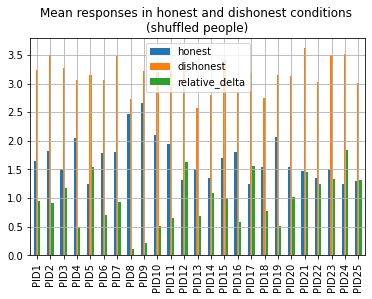

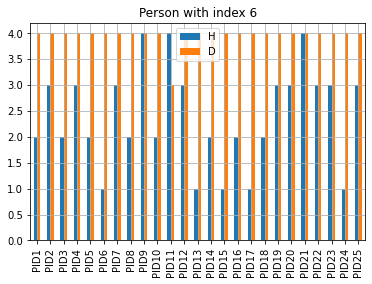

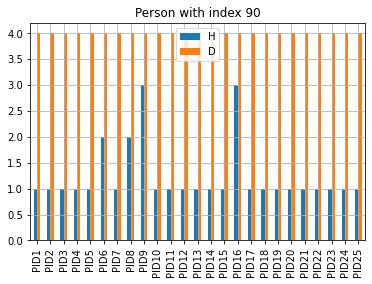

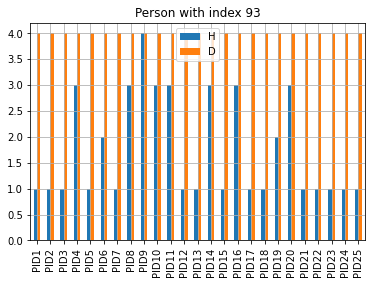

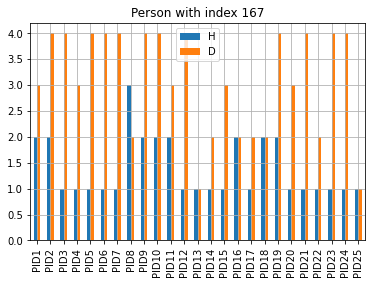

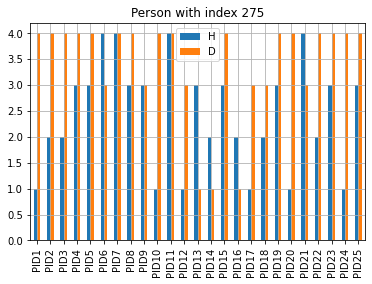

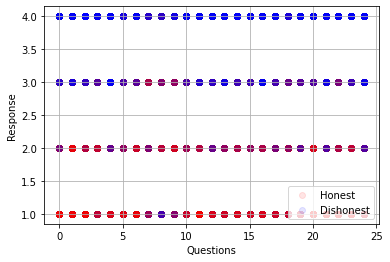

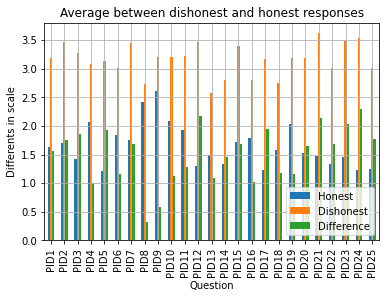

In [ ]:
plot_insights(df_train, df_sample)

## Problem statement

Fitting SVM
Fitting Random forest
Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
SVM                          0.970482        0.00591774                  0.956627           0.019576
Random forest                1               0                           0.96747            0.0124044


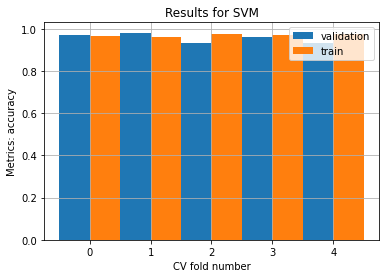

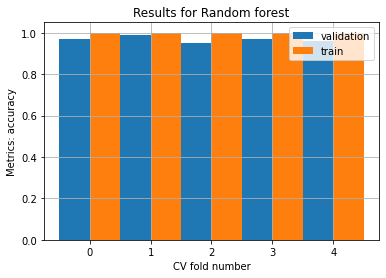

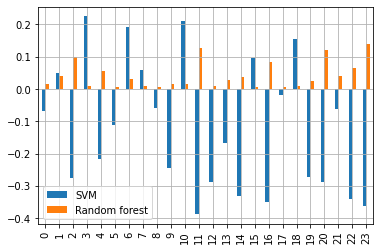

In [ ]:
plot_problem_statement(df_trainval)

## Robust feature selection

In [ ]:
experiment_results = run_feature_selection_experiments(
    df_trainval,
    df_train,
    df_validation,
    df_test,
    {
        'chi2': chi2,
        'mutual information': mutual_info_classif,
        'ANOVA': f_classif
    }
)

## Finding secret features

Data shape before reduction: (830, 25)
Data shape after reduction: (830, 5)

        Mean cross-validation accuracy:
        On full data:
        0.9662650602409638,
        On reduced data:
        0.9554216867469879
        Principal features indices:
        [23 11 20  4 16]
        


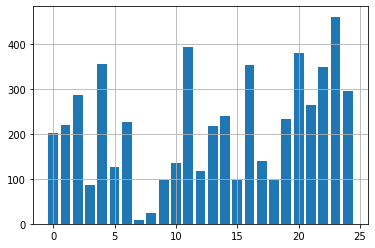

In [ ]:
main_features = find_main_features(
    n_features_=5,
    feature_selection_function_=chi2,
    X_=experiment_results['chi2']['trainval_processed'][0],
    Y_=experiment_results['chi2']['trainval_processed'][1],
    sklearn_model_=experiment_results['chi2'][
        'grid_search_results']['Random forest'].best_estimator_
)

Index(['PID24', 'PID12', 'PID21', 'PID5', 'PID17'], dtype='object')


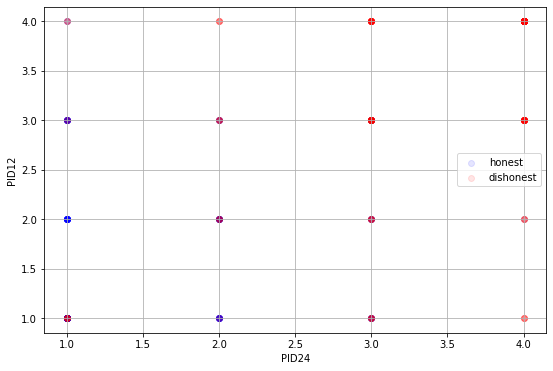

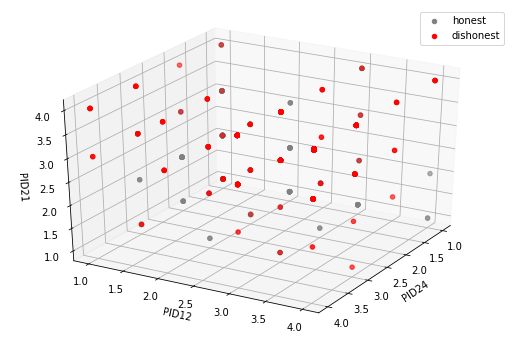

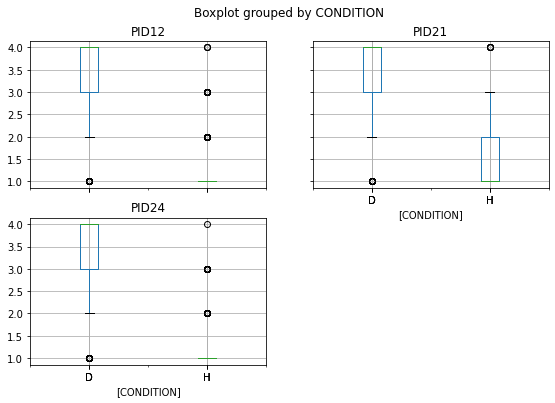

In [ ]:
main_feature_names = get_feature_names(
    experiment_results['chi2']['trainval_processed'][0],
    df_trainval,
    main_features
)
print(main_feature_names)

report_outliers(
    df_trainval,
    main_feature_names[0]
)

visualize_clusters(
    df_trainval,
    main_feature_names[:3],
    figsize=(9, 6),
    azim=30,
    elev=30
)

# 8 PRFQ

## Download the data

In [ ]:
dataset = read_data(
    datasets_folder_path,
    '8. PRFQ'
)
dataset.shape

(678, 19)

## Quick look and check the data

In [ ]:
check_data(dataset)

In [ ]:
check_split_correctness(dataset, 'CONDITION')

## Create trainval + test + pspychological sets

In [ ]:
from sklearn.model_selection import train_test_split


df_trainval, df_test = train_test_split(
    dataset,
    train_size=TRAINVAL_SIZE,
    random_state=RANDOM_STATE,
    stratify=dataset['CONDITION']
)

check_split_correctness(df_trainval, 'CONDITION')
check_split_correctness(df_test, 'CONDITION')

df_trainval.shape, df_test.shape

((542, 19), (136, 19))

In [ ]:
df_train, df_validation = train_test_split(
    df_trainval,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE,
    stratify=df_trainval['CONDITION']
)

[check_split_correctness(df, 'CONDITION') for df in [df_train, df_validation]]

[None, None]

In [ ]:
df_sample = prepare_sample(
    dataset,
    sample_size_=PSYCHOLOGIC_SAMPLE_SIZE,
    random_state_=RANDOM_STATE
)

verify_sample_correctness(dataset, df_sample)
df_sample.head()

PreM1  PreM2  PreM3  PreM4  PreM5  PreM6  C1  C2  C3  C4  C5  C6  IC1  \
284      1      1      1      1      1      2   4   3   4   5   4   4    5   
116      1      1      1      1      1      5   3   1   1   5   4   3    2   
113      5      1      2      1      1      4   4   4   5   3   5   3    4   
42       1      1      1      1      1      1   2   1   3   3   1   1    5   
126      2      1      4      1      2      2   3   3   3   2   4   2    5   

     IC2  IC3  IC4  IC5  IC6 CONDITION  
284    3    5    4    5    5         H  
116    4    4    1    5    3         H  
113    4    5    5    5    5         H  
42     4    5    5    3    3         H  
126    5    5    5    5    5         H

## Data exploration (with train set only)

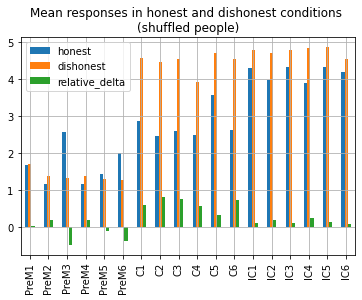

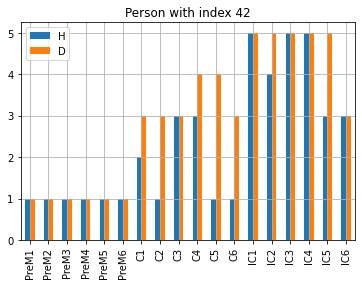

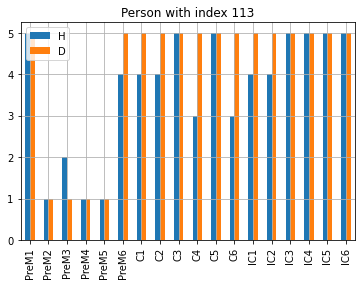

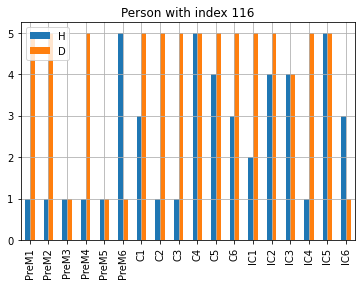

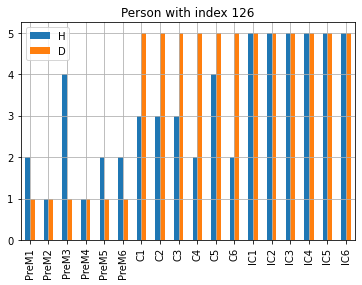

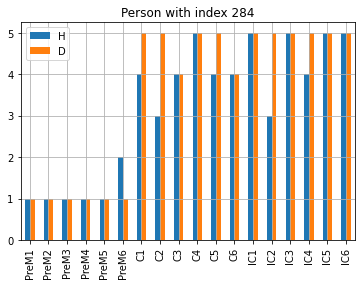

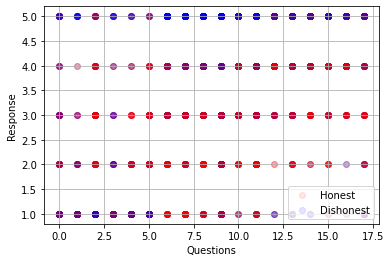

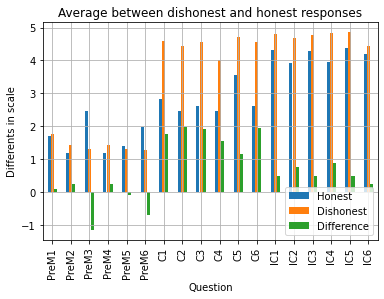

In [ ]:
plot_insights(df_train, df_sample)

## Problem statement

Fitting SVM
Fitting Random forest
Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
SVM                          0.928508        0.00523522                  0.900408           0.0195483
Random forest                1               0                           0.920676           0.0257758


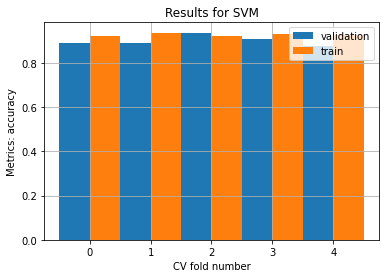

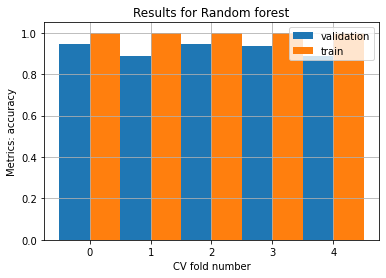

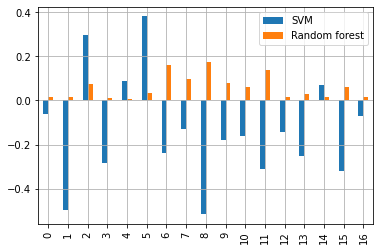

In [ ]:
plot_problem_statement(df_trainval)

## Robust feature selection

In [ ]:
experiment_results = run_feature_selection_experiments(
    df_trainval,
    df_train,
    df_validation,
    df_test,
    {
        'chi2': chi2,
        'mutual information': mutual_info_classif,
        'ANOVA': f_classif
    }
)

## Finding secret features

Data shape before reduction: (542, 18)
Data shape after reduction: (542, 5)

        Mean cross-validation accuracy:
        On full data:
        0.900407747196738,
        On reduced data:
        0.8984879374787631
        Principal features indices:
        [ 7  8 11  6  2]
        


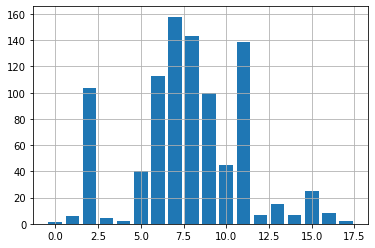

In [ ]:
main_features = find_main_features(
    n_features_=5,
    feature_selection_function_=chi2,
    X_=experiment_results['chi2']['trainval_processed'][0],
    Y_=experiment_results['chi2']['trainval_processed'][1],
    sklearn_model_=experiment_results['chi2'][
        'grid_search_results']['SVM'].best_estimator_
)

Index(['C2', 'C3', 'C6', 'C1', 'PreM3'], dtype='object')


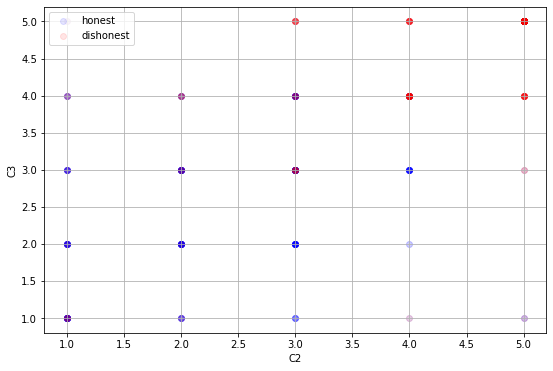

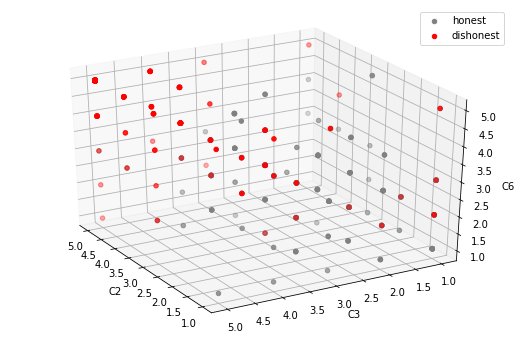

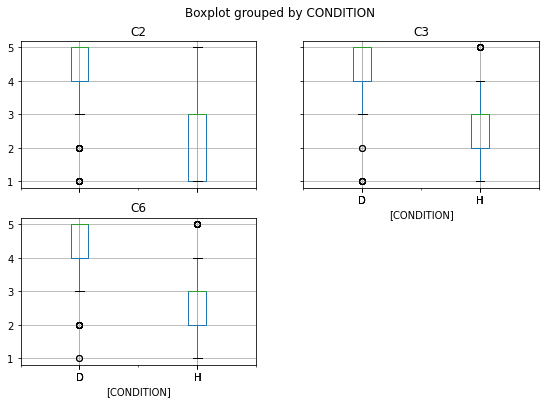

In [ ]:
main_feature_names = get_feature_names(
    experiment_results['chi2']['trainval_processed'][0],
    df_trainval,
    main_features
)
print(main_feature_names)

report_outliers(
    df_trainval,
    main_feature_names[0]
)

visualize_clusters(
    df_trainval,
    main_feature_names[:3],
    figsize=(9, 6),
    azim=150,
    elev=30
)

# 9 IESR

## Download the data

In [ ]:
dataset = read_data(
    datasets_folder_path,
    '9. IESR'
)

## Quick look and check the data

In [ ]:
check_data(dataset)

In [ ]:
check_split_correctness(dataset, 'CONDITION')

## Create trainval + test + psychological sets

In [ ]:
from sklearn.model_selection import train_test_split


df_trainval, df_test = train_test_split(
    dataset,
    train_size=TRAINVAL_SIZE,
    random_state=RANDOM_STATE,
    stratify=dataset['CONDITION']
)

[check_split_correctness(df, 'CONDITION') for df in (df_trainval, df_test)]

df_trainval.shape, df_test.shape

((286, 23), (72, 23))

In [ ]:
df_train, df_validation = train_test_split(
    df_trainval,
    random_state=RANDOM_STATE,
    train_size=TRAIN_SIZE,
    stratify=df_trainval['CONDITION']
)

[check_split_correctness(df, 'CONDITION') for df in (df_train, df_validation)]
df_train.shape, df_validation.shape

((228, 23), (58, 23))

In [ ]:
df_sample = prepare_sample(
    dataset,
    sample_size_=PSYCHOLOGIC_SAMPLE_SIZE,
    random_state_=RANDOM_STATE
)

verify_sample_correctness(dataset, df_sample)
df_sample.head()

IESR1  IESR2  IESR3  IESR4  IESR5  IESR6  IESR7  IESR8  IESR9  IESR10  \
78       3      2      2      3      2      1      1      1      1       2   
16       1      1      1      2      1      2      1      1      1       1   
65       1      1      1      2      1      1      1      3      1       3   
114      3      2      3      3      2      3      2      2      2       2   
76       3      1      2      2      2      2      1      2      2       2   

     ...  IESR14  IESR15  IESR16  IESR17  IESR18  IESR19  IESR20  IESR21  \
78   ...       1       1       5       1       3       2       1       1   
16   ...       1       2       1       1       2       1       1       1   
65   ...       1       3       1       4       1       1       1       1   
114  ...       1       1       3       3       2       1       2       1   
76   ...       1       2       3       1       2       1       2       3   

     IESR22  CONDITION  
78        1          H  
16        1          H  
65        1          H  
114       2          H  
76        1          H  

[5 rows x 23 columns]

## Data exploration (on train set only)

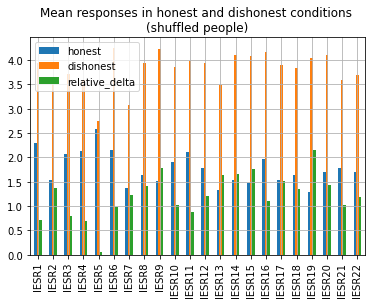

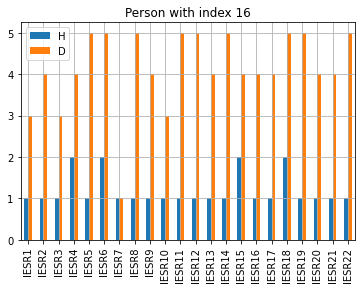

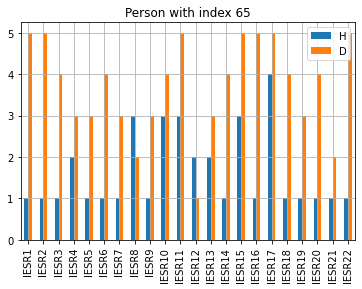

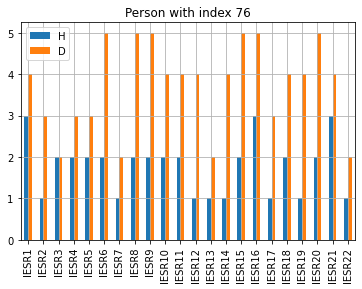

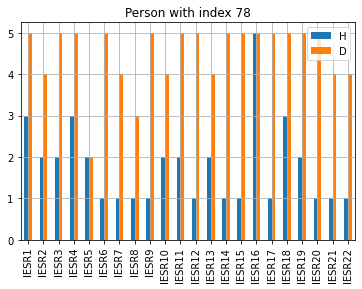

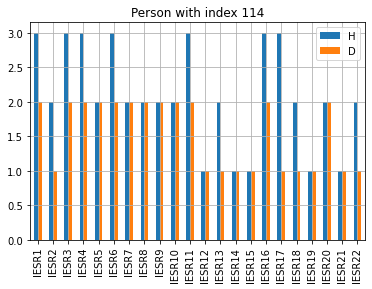

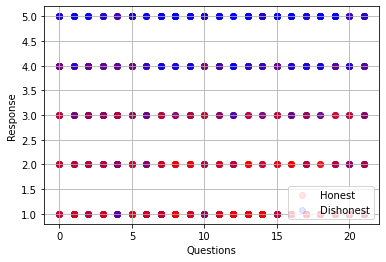

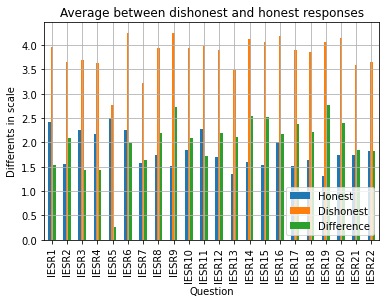

In [ ]:
plot_insights(df_train, df_sample)

## Problem statement

Fitting SVM
Fitting Random forest
Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
SVM                           0.95018        0.00342662                  0.905687           0.0321828
Random forest                 1              0                           0.926739           0.0294985


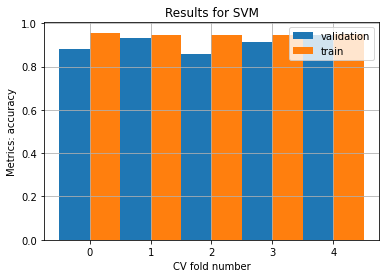

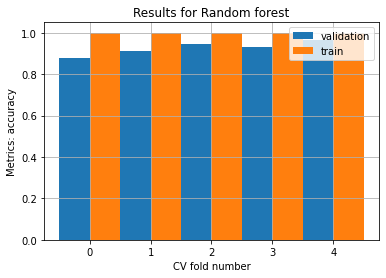

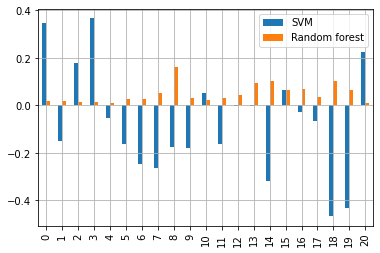

In [ ]:
plot_problem_statement(df_trainval)

## Robust feature selection

In [ ]:
experiment_results = run_feature_selection_experiments(
    df_trainval,
    df_train,
    df_validation,
    df_test,
    {
        'chi2': chi2,
        'mutual information': mutual_info_classif,
        'ANOVA': f_classif
    }
)

## Finding secret features

Data shape before reduction: (286, 22)
Data shape after reduction: (286, 5)

        Mean cross-validation accuracy:
        On full data:
        0.8952813067150636,
        On reduced data:
        0.9267997580157289
        Principal features indices:
        [18  8 14 13 19]
        


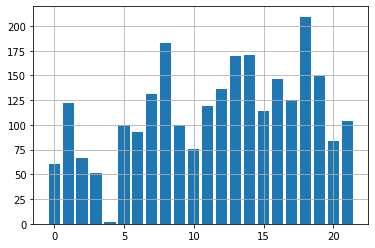

In [ ]:
main_features = find_main_features(
    n_features_=5,
    feature_selection_function_=chi2,
    X_=experiment_results['chi2']['trainval_processed'][0],
    Y_=experiment_results['chi2']['trainval_processed'][1],
    sklearn_model_=experiment_results['chi2'][
        'grid_search_results']['SVM'].best_estimator_
)

Index(['IESR19', 'IESR9', 'IESR15', 'IESR14', 'IESR20'], dtype='object')


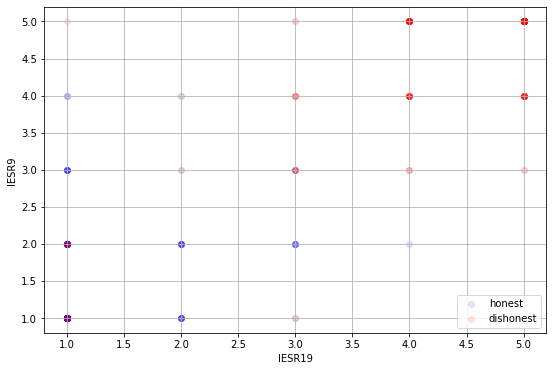

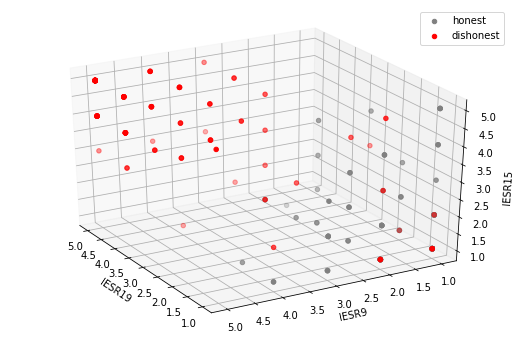

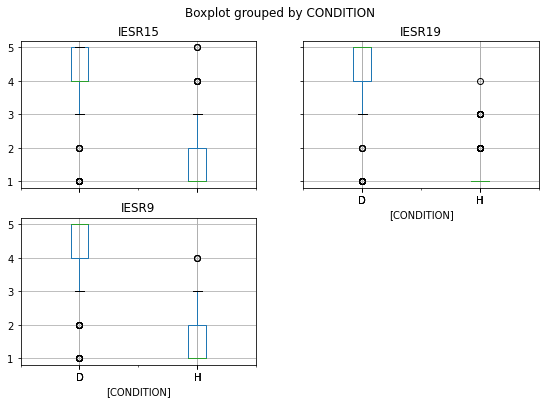

In [ ]:
main_feature_names = get_feature_names(
    experiment_results_chi2['trainval_processed'][0],
    df_trainval,
    main_features
)
print(main_feature_names)

report_outliers(
    df_trainval,
    main_feature_names[0]
)

visualize_clusters(
    df_trainval,
    main_feature_names[:3],
    figsize=(9, 6),
    azim=150,
    elev=30
)

# 11 DDDT

## Read the data

In [ ]:
dataset = read_data(
    datasets_folder_path,
    '11. DDDT'
)
dataset.head()

P1  N2  P3  M4  P5  M6  N7  N8  M9  P10  M11  N12 CONDITION
0   2   4   1   1   1   1   1   4   2    3    1    1         H
1   2   3   2   1   1   1   2   4   1    1    1    3         H
2   1   3   1   2   1   1   2   3   3    1    2    2         H
3   2   4   2   3   2   2   3   4   2    4    3    4         H
4   1   2   1   1   2   2   3   1   1    1    1    2         H

## Quick look and check the data

In [ ]:
check_data(dataset)
check_split_correctness(dataset, 'CONDITION')

## Create trainval + test + psychological sets

In [ ]:
df_trainval, df_test = train_test_split(
    dataset,
    train_size=TRAINVAL_SIZE,
    random_state=RANDOM_STATE,
    stratify=dataset.CONDITION
)

df_train, df_validation = train_test_split(
    df_trainval,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE,
    stratify=df_trainval.CONDITION
)

[
    check_split_correctness(df, 'CONDITION')
    for df in [
        df_trainval,
        df_test,
        df_train,
        df_validation
    ]
]

print(df_trainval.shape, df_test.shape, df_train.shape, df_validation.shape)

(788, 13) (198, 13) (630, 13) (158, 13)


In [ ]:
df_sample = prepare_sample(
    dataset,
    sample_size_=PSYCHOLOGIC_SAMPLE_SIZE,
    random_state_=RANDOM_STATE
)

verify_sample_correctness(dataset, df_sample)
df_sample.head()

P1  N2  P3  M4  P5  M6  N7  N8  M9  P10  M11  N12 CONDITION
454   3   4   1   1   1   1   4   4   1    1    1    2         H
73    2   4   2   1   2   1   2   4   1    2    1    2         H
310   2   2   2   2   3   2   3   4   4    4    4    2         H
175   2   3   2   4   2   2   4   4   2    2    2    3         H
332   3   2   2   2   2   2   2   2   1    3    1    1         H

## Data exploration (on train set only)

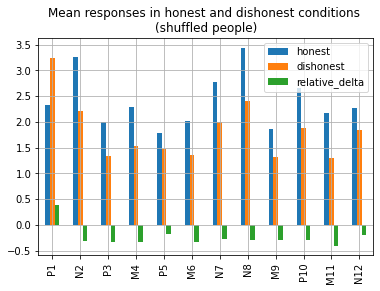

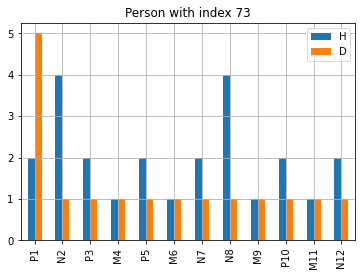

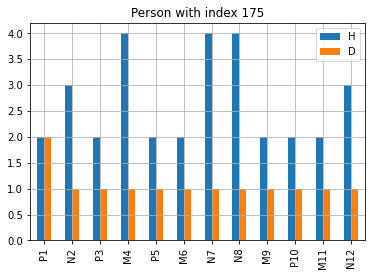

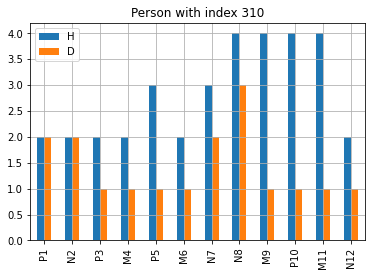

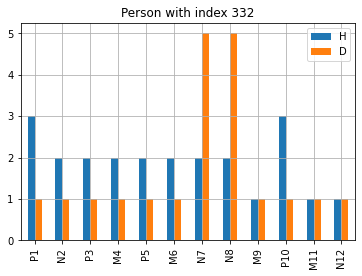

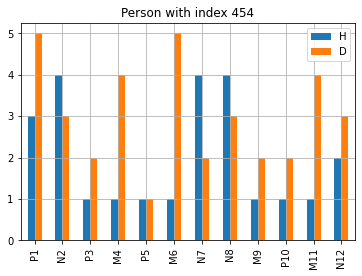

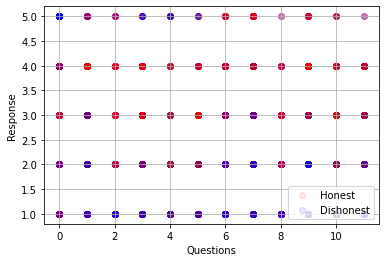

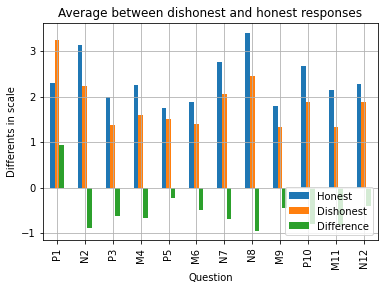

In [ ]:
plot_insights(df_train, df_sample)

## Problem statement

Fitting SVM
Fitting Random forest
Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
Random forest                0.984455        0.00118385                  0.756365           0.0237415
SVM                          0.767768        0.00808458                  0.756382           0.0291003


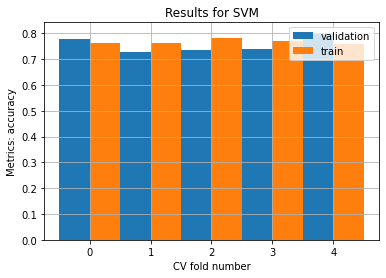

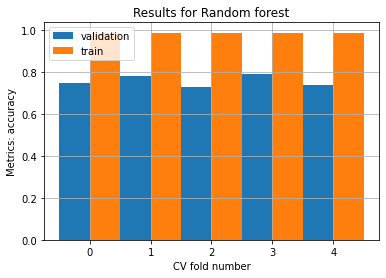

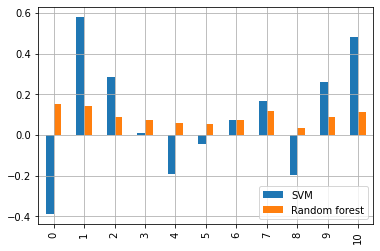

In [ ]:
plot_problem_statement(df_trainval)

## Robust feature selection

In [ ]:
experiment_results = run_feature_selection_experiments(
    df_trainval,
    df_train,
    df_validation,
    df_test,
    {
        'chi2': chi2,
        'mutual information': mutual_info_classif,
        'ANOVA': f_classif
    }
)

## Finding secret features

Data shape before reduction: (788, 12)
Data shape after reduction: (788, 5)

        Mean cross-validation accuracy:
        On full data:
        0.7589373538660001,
        On reduced data:
        0.7436749173587035
        Principal features indices:
        [10  1  7  0  3]
        


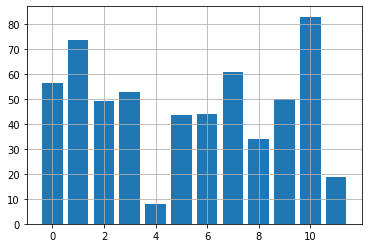

In [ ]:
main_features = find_main_features(
    n_features_=5,
    feature_selection_function_=chi2,
    X_=experiment_results['chi2']['trainval_processed'][0],
    Y_=experiment_results['chi2']['trainval_processed'][1],
    sklearn_model_=experiment_results['chi2'][
        'grid_search_results']['SVM'].best_estimator_
)

Index(['M11', 'N2', 'N8', 'P1', 'M4'], dtype='object')


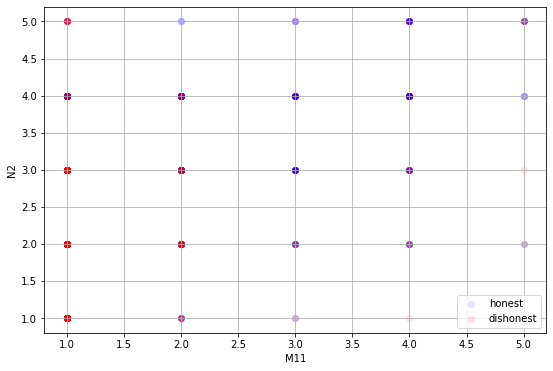

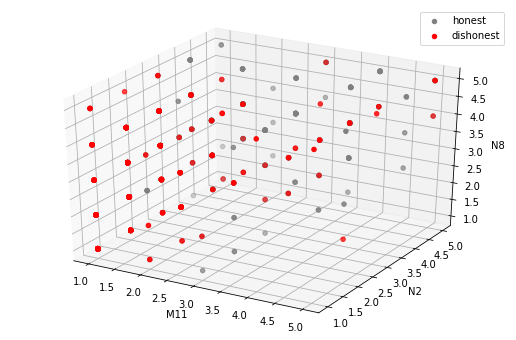

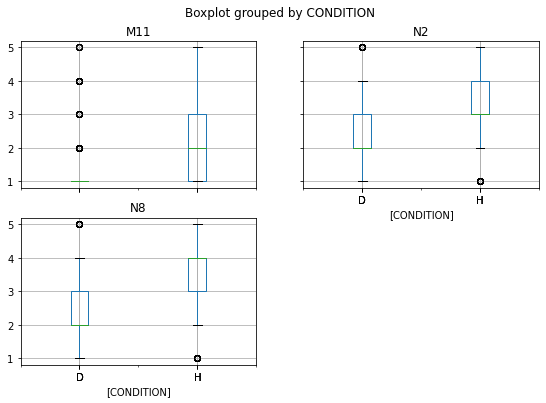

In [ ]:
main_feature_names = get_feature_names(
    experiment_results['chi2']['trainval_processed'][0],
    df_trainval,
    main_features
)
print(main_feature_names)

report_outliers(
    df_trainval,
    main_feature_names[0]
)

visualize_clusters(
    df_trainval,
    main_feature_names[:3],
    figsize=(9, 6),
    azim=0,
    elev=10
)

# 12 IADQ

## Download the data

In [ ]:
dataset = read_data(
    datasets_folder_path,
    '12. IADQ'
)

## Quick look and check the data

In [ ]:
check_data(dataset)

In [ ]:
check_split_correctness(dataset, 'CONDITION')

## Create trainval + test + psychological sets

In [ ]:
from sklearn.model_selection import train_test_split


df_trainval, df_test = train_test_split(
    dataset,
    train_size=TRAINVAL_SIZE,
    random_state=RANDOM_STATE,
    stratify=dataset.CONDITION
)

df_train, df_validation = train_test_split(
    df_trainval,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE,
    stratify=df_trainval.CONDITION
)

[
    check_split_correctness(df, 'CONDITION')
    for df in [
        df_trainval,
        df_test,
        df_train,
        df_validation
    ]
]

df_trainval.shape, df_test.shape, df_train.shape, df_validation.shape

((360, 10), (90, 10), (288, 10), (72, 10))

In [ ]:
df_sample = prepare_sample(
    dataset,
    sample_size_=PSYCHOLOGIC_SAMPLE_SIZE,
    random_state_=RANDOM_STATE
)

verify_sample_correctness(dataset, df_sample)
df_sample.head()

Pr1  Pr2  Pr3  FA1  FA2  FA3  FI1  FI2  FI3 CONDITION
9      1    1    1    0    0    1    0    0    1         H
184    4    4    4    4    4    4    4    4    4         H
120    3    2    3    3    3    3    3    3    3         H
207    2    2    2    1    2    2    2    2    2         H
148    3    4    4    3    3    3    4    4    4         H

## Data exploration (on train set only)

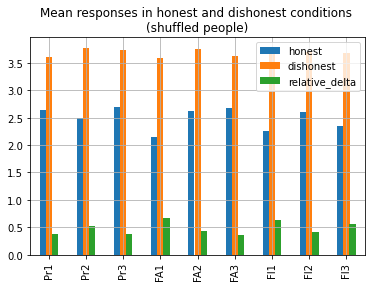

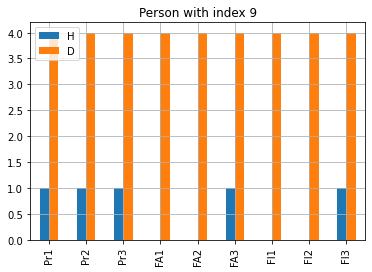

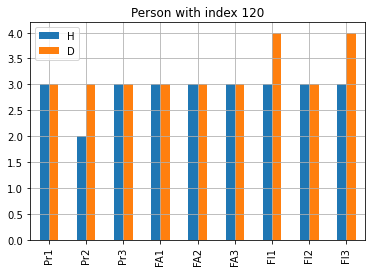

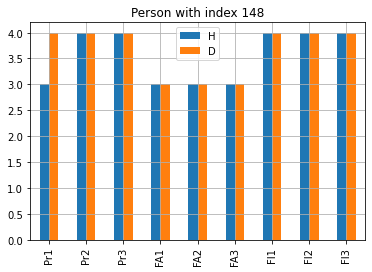

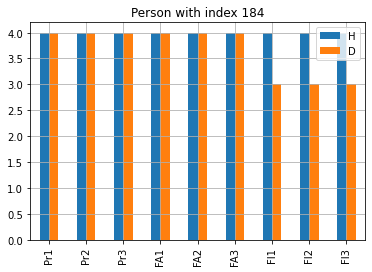

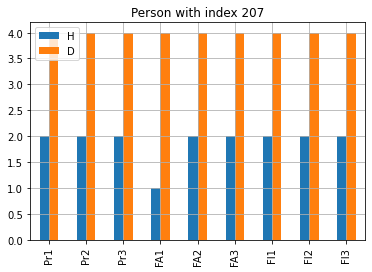

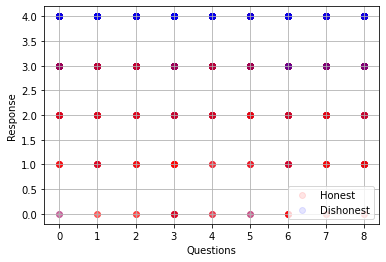

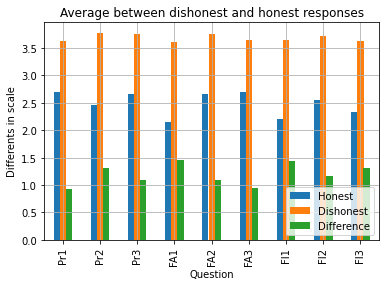

In [ ]:
plot_insights(df_train, df_sample)

## Problem statement

Fitting SVM
Fitting Random forest
Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
Random forest                0.959028        0.00673289                  0.816667           0.0522636
SVM                          0.8625          0.00996715                  0.852778           0.0516697


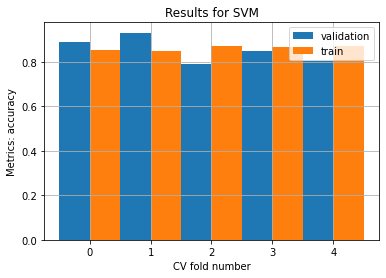

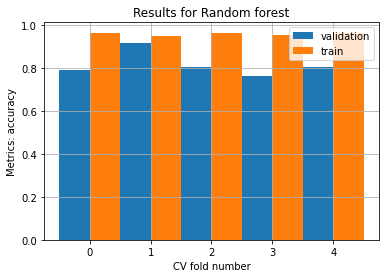

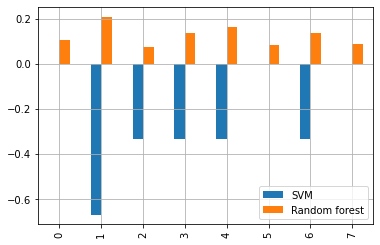

In [ ]:
plot_problem_statement(df_trainval)

## Feature selection

In [ ]:
experiment_results = run_feature_selection_experiments(
    df_trainval,
    df_train,
    df_validation,
    df_test,
    {
        'chi2': chi2,
        'mutual information': mutual_info_classif,
        'ANOVA': f_classif
    }
)

## Finding secret features

Data shape before reduction: (360, 9)
Data shape after reduction: (360, 5)

        Mean cross-validation accuracy:
        On full data:
        0.8444444444444444,
        On reduced data:
        0.8527777777777779
        Principal features indices:
        [3 6 8 1 4]
        


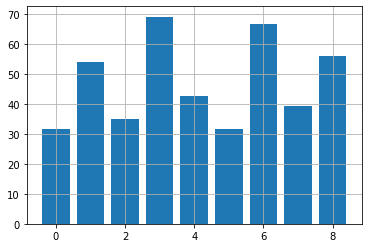

In [ ]:
main_features = find_main_features(
    n_features_=5,
    feature_selection_function_=chi2,
    X_=experiment_results['chi2']['trainval_processed'][0],
    Y_=experiment_results['chi2']['trainval_processed'][1],
    sklearn_model_=experiment_results['chi2'][
        'grid_search_results']['SVM'].best_estimator_
)

Index(['FA1', 'FI1', 'FI3', 'Pr2', 'FA2'], dtype='object')


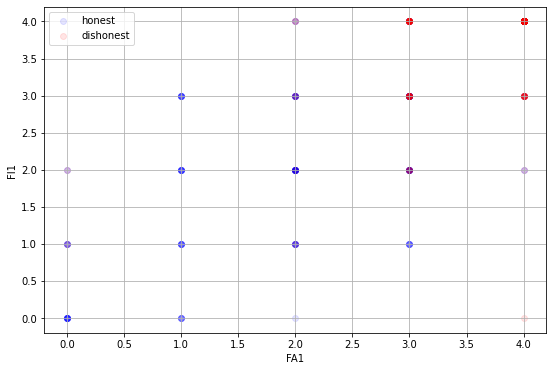

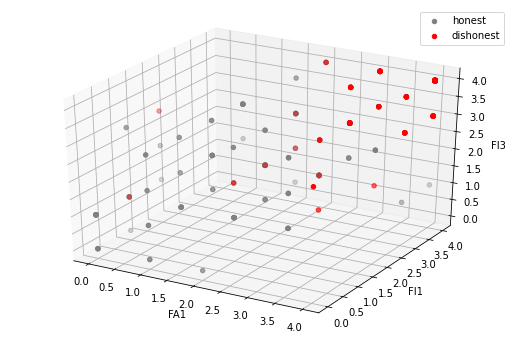

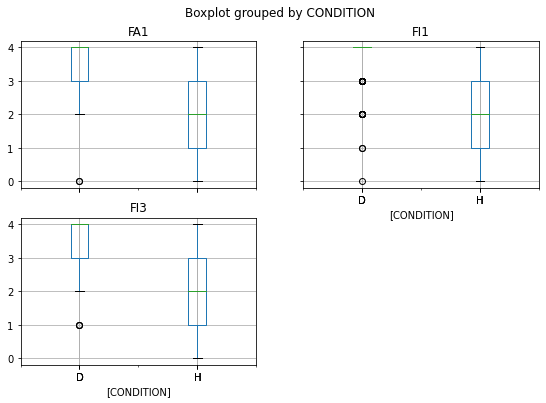

In [ ]:
main_feature_names = get_feature_names(
    experiment_results['chi2']['trainval_processed'][0],
    df_trainval,
    main_features
)
print(main_feature_names)

report_outliers(
    df_trainval,
    main_feature_names[0]
)

visualize_clusters(
    df_trainval,
    main_feature_names[:3],
    figsize=(9, 6),
    azim=0,
    elev=10
)

# 13 BF (3)

## Download the data

In [ ]:
df_ctu, df_ou, df_v = read_data(
    datasets_folder_path,
    '13. BF (3)'
)

## Quick look and check the data

In [ ]:
check_data(df_ctu)
check_data(df_ou)
check_data(df_v)

In [ ]:
[
    check_split_correctness(df, 'CONDITION')
    for df in [df_ctu, df_ou, df_v]
]

[None, None, None]

## Create trainval + test + psychological sets

In [ ]:
from sklearn.model_selection import train_test_split


df_trainval_ctu, df_test_ctu = train_test_split(
    df_ctu,
    random_state=RANDOM_STATE,
    train_size=TRAINVAL_SIZE,
    stratify=df_ctu.CONDITION
)

df_trainval_ou, df_test_ou = train_test_split(
    df_ou,
    random_state=RANDOM_STATE,
    train_size=TRAINVAL_SIZE,
    stratify=df_ou.CONDITION
)

df_trainval_v, df_test_v = train_test_split(
    df_v,
    random_state=RANDOM_STATE,
    train_size=TRAINVAL_SIZE,
    stratify=df_v.CONDITION
)

[
    check_split_correctness(df, 'CONDITION')
    for df in [
        df_trainval_ctu, df_test_ctu,
        df_trainval_ou, df_test_ou,
        df_trainval_v, df_test_v
    ]
]

print(df_trainval_ctu.shape, df_test_ctu.shape)
print(df_trainval_ou.shape, df_test_ou.shape)
print(df_trainval_v.shape, df_test_v.shape)

(353, 11) (89, 11)
(368, 11) (92, 11)
(388, 11) (98, 11)


In [ ]:
df_train_ctu, df_validation_ctu = train_test_split(
    df_trainval_ctu,
    random_state=RANDOM_STATE,
    train_size=TRAIN_SIZE,
    stratify=df_trainval_ctu.CONDITION
)

df_train_ou, df_validation_ou = train_test_split(
    df_trainval_ou,
    random_state=RANDOM_STATE,
    train_size=TRAIN_SIZE,
    stratify=df_trainval_ou.CONDITION
)

df_train_v, df_validation_v = train_test_split(
    df_trainval_v,
    random_state=RANDOM_STATE,
    train_size=TRAIN_SIZE,
    stratify=df_trainval_v.CONDITION
)

[
    check_split_correctness(df, 'CONDITION')
    for df in [
        df_train_ctu, df_validation_ctu,
        df_train_ou, df_validation_ou,
        df_train_v, df_validation_v
    ]
]

print(df_train_ctu.shape, df_validation_ctu.shape)
print(df_train_ou.shape, df_validation_ou.shape)
print(df_train_v.shape, df_validation_v.shape)

(282, 11) (71, 11)
(294, 11) (74, 11)
(310, 11) (78, 11)


In [ ]:
df_sample_ctu = prepare_sample(
    df_ctu,
    sample_size_=PSYCHOLOGIC_SAMPLE_SIZE,
    random_state_=RANDOM_STATE
)

verify_sample_correctness(df_ctu, df_sample_ctu)
df_sample_ctu.head()

EX1G  EX2G  A1G  A2G  C1G  C2G  ES1G  ES2G  O1G  O2G CONDITION
132     5     3    3    1    2    5     5     3    2    3         H
148     4     4    3    4    1    5     2     1    2    2         H
93      5     3    3    2    3    4     3     3    4    4         H
180     4     2    3    4    4    4     4     4    4    3         H
15      4     3    3    3    3    4     3     3    2    4         H

In [ ]:
df_sample_ou = prepare_sample(
    df_ou,
    sample_size_=PSYCHOLOGIC_SAMPLE_SIZE,
    random_state_=RANDOM_STATE
)

verify_sample_correctness(df_ou, df_sample_ou)

df_sample_v = prepare_sample(
    df_v,
    sample_size_=PSYCHOLOGIC_SAMPLE_SIZE,
    random_state_=RANDOM_STATE
)

verify_sample_correctness(df_v, df_sample_v)

## Data exploration (on train set only)

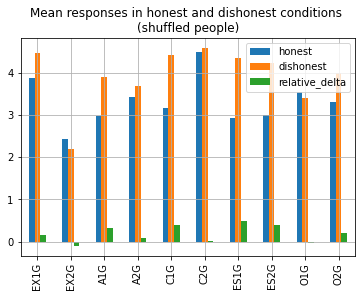

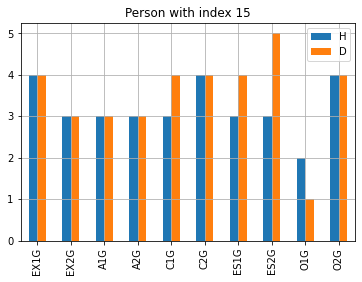

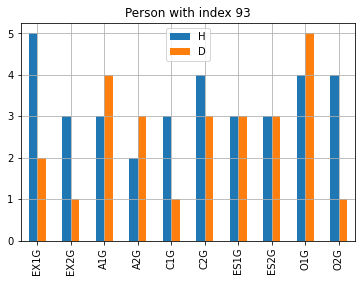

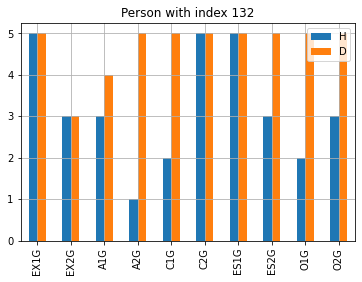

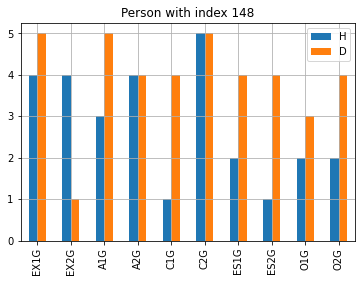

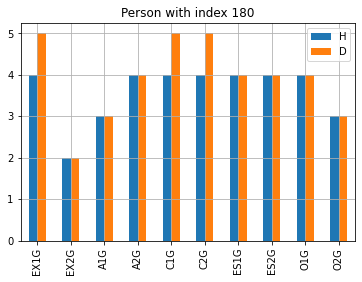

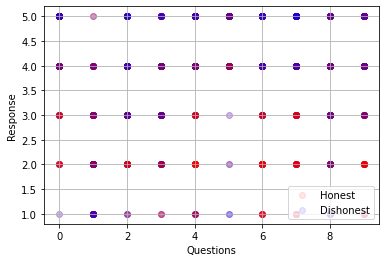

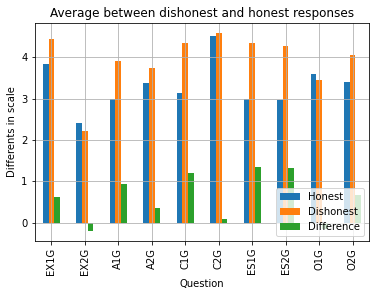

In [ ]:
plot_insights(df_ctu, df_sample_ctu)

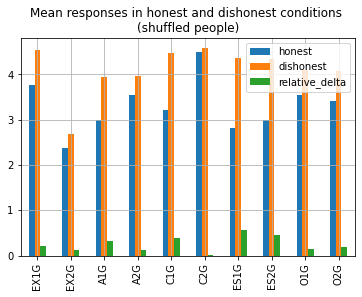

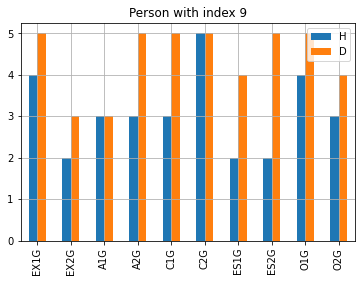

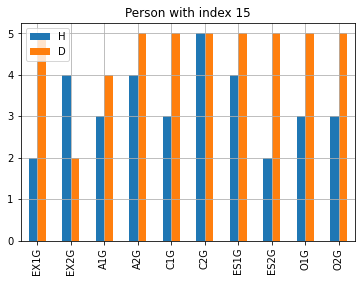

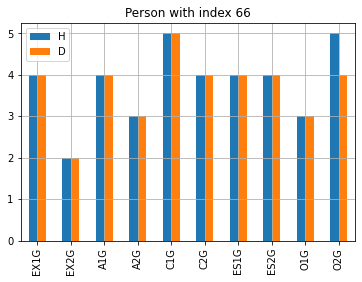

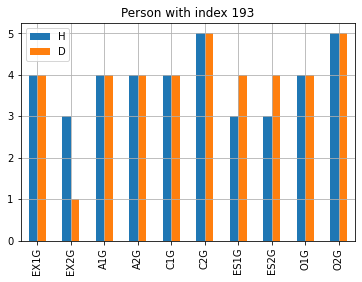

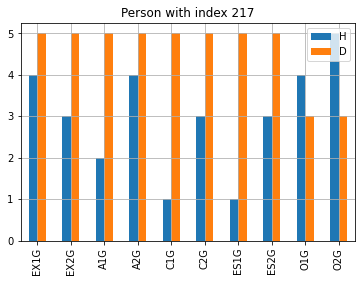

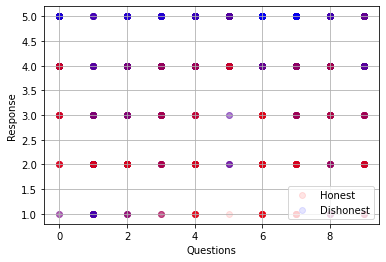

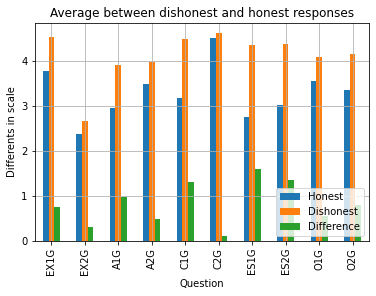

In [ ]:
plot_insights(df_ou, df_sample_ou)

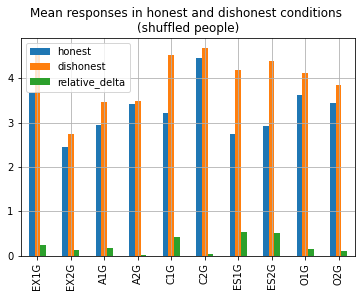

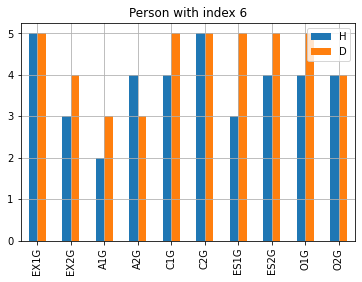

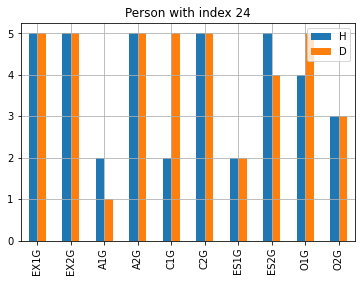

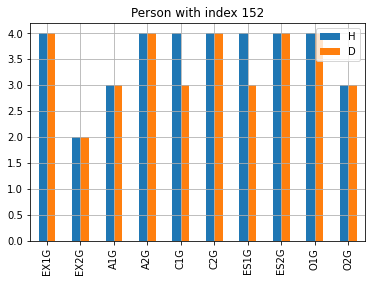

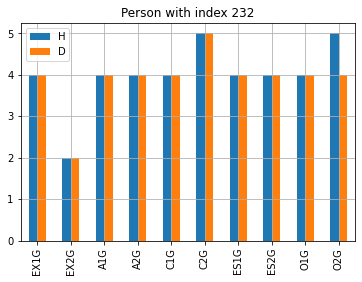

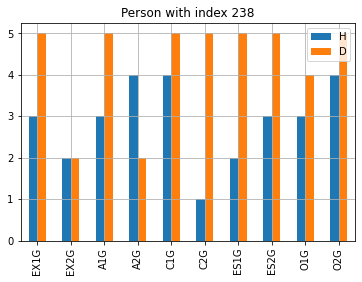

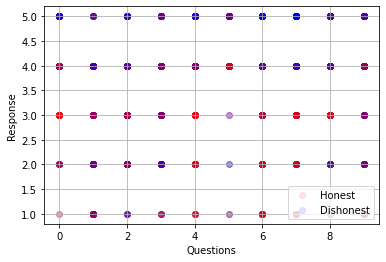

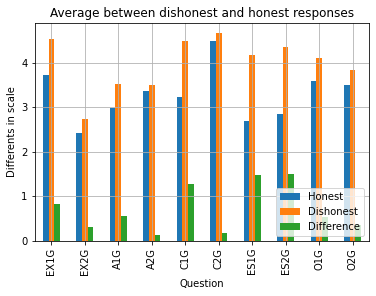

In [ ]:
plot_insights(df_v, df_sample_v)

## Problem statement

Fitting SVM
Fitting Random forest
Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
SVM                          0.831429       0.0141036                    0.812797           0.0505253
Random forest                0.992918       1.22772e-05                  0.829899           0.0303495


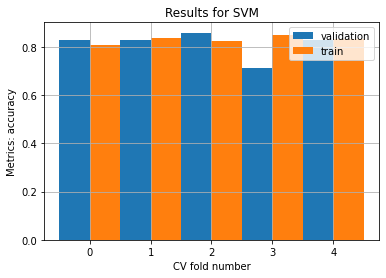

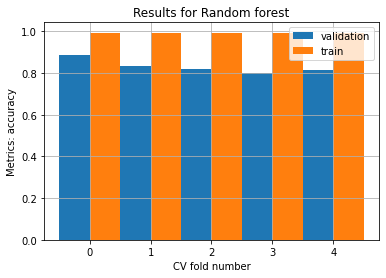

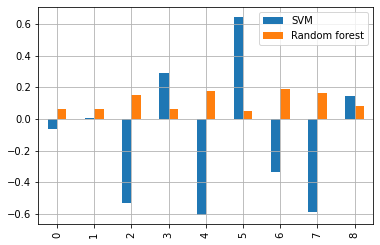

In [ ]:
plot_problem_statement(df_trainval_ctu)

Fitting SVM
Fitting Random forest
Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
SVM                          0.845103        0.00773952                  0.817845           0.0331757
Random forest                0.988452        0.00166078                  0.831618           0.0175557


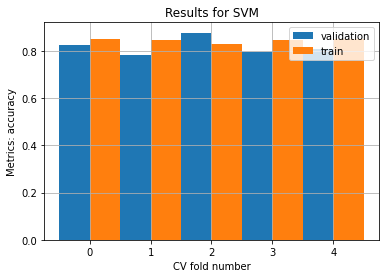

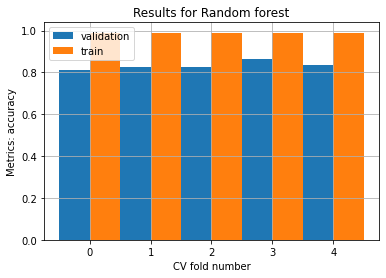

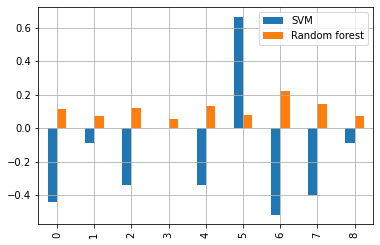

In [ ]:
plot_problem_statement(df_trainval_ou)

Fitting SVM
Fitting Random forest
Model            Seen folds avg score    Seen folds std    Unseen folds avg score    Unseen folds std
-------------  ----------------------  ----------------  ------------------------  ------------------
SVM                          0.823458        0.0107622                   0.801365           0.038104
Random forest                0.997424        0.00128826                  0.80666            0.0145774


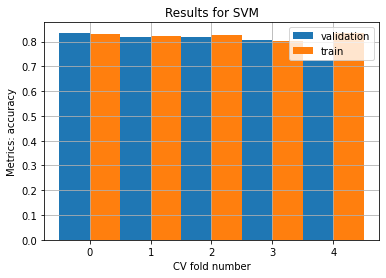

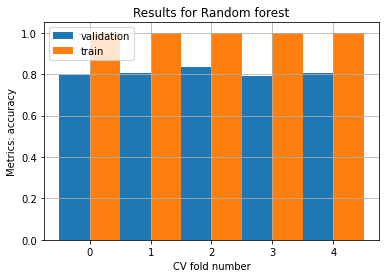

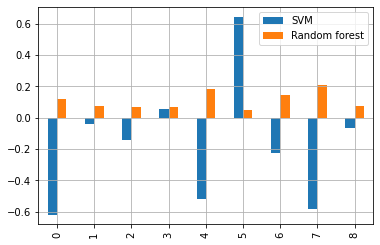

In [ ]:
plot_problem_statement(df_trainval_v)

## Robust feature selection

In [ ]:
experiment_results_ctu = run_feature_selection_experiments(
    df_trainval_ctu,
    df_train_ctu,
    df_validation_ctu,
    df_test_ctu,
    {
        'chi2': chi2,
        'mutual information': mutual_info_classif,
        'ANOVA': f_classif
    }
)

In [ ]:
experiment_results_ou = run_feature_selection_experiments(
    df_trainval_ou,
    df_train_ou,
    df_validation_ou,
    df_test_ou,
    {
        'chi2': chi2,
        'mutual information': mutual_info_classif,
        'ANOVA': f_classif
    }
)

In [ ]:
experiment_results_v = run_feature_selection_experiments(
    df_trainval_v,
    df_train_v,
    df_validation_v,
    df_test_v,
    {
        'chi2': chi2,
        'mutual information': mutual_info_classif,
        'ANOVA': f_classif
    }
)

## Finding secret features

Data shape before reduction: (360, 9)
Data shape after reduction: (360, 5)

        Mean cross-validation accuracy:
        On full data:
        0.8444444444444444,
        On reduced data:
        0.8527777777777779
        Principal features indices:
        [3 6 8 1 4]
        


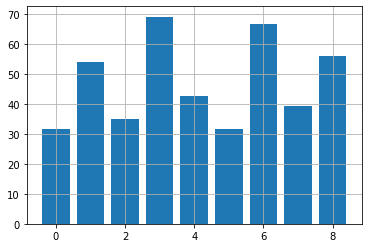

In [ ]:
main_features_ctu = find_main_features(
    n_features_=5,
    feature_selection_function_=chi2,
    X_=experiment_results_ctu['chi2']['trainval_processed'][0],
    Y_=experiment_results_ctu['chi2']['trainval_processed'][1],
    sklearn_model_=experiment_results_ctu['chi2'][
        'grid_search_results']['SVM'].best_estimator_
)

Index(['A2G', 'ES1G', 'O1G', 'EX2G', 'C1G'], dtype='object')


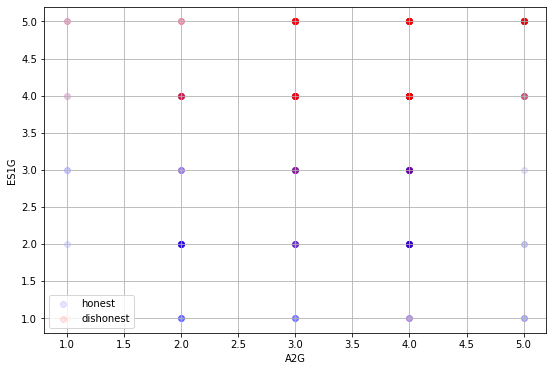

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

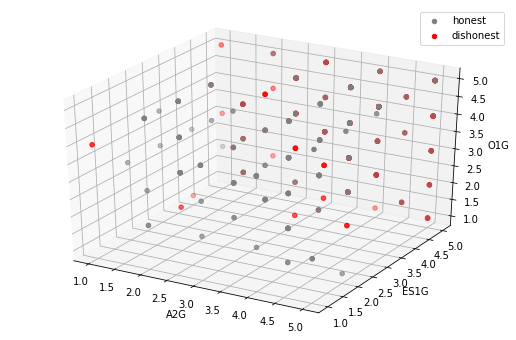

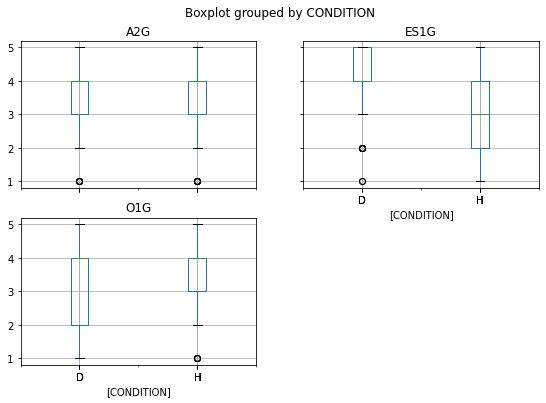

In [ ]:
main_feature_names = get_feature_names(
    experiment_results_ctu['chi2']['trainval_processed'][0],
    df_trainval_ctu,
    main_features
)
print(main_feature_names)

report_outliers(
    df_trainval,
    main_feature_names[0]
)

visualize_clusters(
    df_trainval_ctu,
    main_feature_names[:3],
    figsize=(9, 6),
    azim=0,
    elev=10
)